In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
hits = pd.concat(pd.read_excel("hits.xlsx", sheet_name=None), ignore_index=True)
hits = hits.rename(columns = {"Entity Name":"ATM ID", "MACHIN TYPE":"MACHINE", "SITE TYPE":"SITE"})
#hits = hits.sort_values(by = "ATM ID", ignore_index = True)
hits

ATM ID      MACHINE     SITE                 REGION            ZONE  \
0      1DBA00013  CAPEX(Dena)   ONSITE                   MMSR     MUMBAI ZONE   
1      1DBA00281  CAPEX(Dena)   ONSITE        JUNAGADH REGION     RAJKOT ZONE   
2      1DBA00332  CAPEX(Dena)  OFFSITE       BHAVNAGAR REGION     RAJKOT ZONE   
3      1DBA00362  CAPEX(Dena)   ONSITE           KHEDA REGION  AHMEDABAD ZONE   
4      1DBA00392  CAPEX(Dena)   ONSITE           ANAND REGION  AHMEDABAD ZONE   
...          ...          ...      ...                    ...             ...   
21176  5DEN17041   OPEX(Dena)  OFFSITE       PRAYAGRAJ REGION    LUCKNOW ZONE   
21177  5DEN17402   OPEX(Dena)  OFFSITE          RAJKOT REGION     RAJKOT ZONE   
21178  5DEN17472   OPEX(Dena)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
21179  5DEN17561   OPEX(Dena)  OFFSITE        JUNAGADH REGION     RAJKOT ZONE   
21180  5DEN18801   OPEX(Dena)   ONSITE        JAMNAGAR REGION     RAJKOT ZONE   

      BRANCH_ALPHA                                            ADDRESS  \
0           DBBMMO                17-HORNIMAN CIRCLE. D.NANJI BLDGS..   
1           DBAMRE     GIRDHARLAL, SANGHARALAY, NEAR CITY BUS STATION   
2           DBSURE  main road  opposite mehata market surendranaga...   
3           DBSPIP   KARMVIR LANDMARK, DESAI VAGO NADIAD, DIST: KHEDA   
4           DHARMA  Bank of Baroda, DHARMAJ Branch,    OPPOSITE : ...   
...            ...                                                ...   
21176       DBPPUR                            PRATAPPUR TAHSIL-HANDIA   
21177       DBDHEB  Jalian Fruit, Nr. Rto And Marketing Yard, 8B N...   
21178       DBVAST  24- Jadeshwar Park, Opp Vastral Main  Gate, Va...   
21179       DBSASA  1ST FLR, GREEN PALACE APARTMENT,,TALUKA MENDAR...   
21180       DBKALY   MAIN BAZAR,KALYANPUR,DIST DEVBHUMI DWARKA 361315   

                         Site Category Txn_Type      1  ...     25     26  \
0      Site not under special category        T   10.0  ...   23.0   24.0   
1      Site not under special category        T  102.0  ...  137.0  118.0   
2      Site not under special category        T   98.0  ...   27.0   74.0   
3      Site not under special category        T    NaN  ...   29.0   39.0   
4      Site not under special category        T    NaN  ...    NaN    3.0   
...                                ...      ...    ...  ...    ...    ...   
21176  Site not under special category        T   35.0  ...    NaN    NaN   
21177  Site not under special category        T   80.0  ...  106.0  101.0   
21178  Site not under special category        T   37.0  ...  148.0  178.0   
21179  Site not under special category        T    NaN  ...   77.0   53.0   
21180  Site not under special category        T    NaN  ...    NaN    NaN   

          27     28     29     30     31   SUM         AVG   New Avg.   
0       21.0   15.0   12.0    4.0   37.0   625   20.161290         NaN  
1      122.0  103.0  102.0   27.0  131.0  3077   99.258065         NaN  
2       11.0    NaN    NaN    2.0   65.0  1846   59.548387         NaN  
3       32.0   29.0   28.0    NaN   50.0   657   21.193548         NaN  
4        NaN    NaN    NaN    NaN    NaN     3    0.096774         NaN  
...      ...    ...    ...    ...    ...   ...         ...         ...  
21176    NaN   31.0   34.0   12.0   46.0   375   12.096774   23.437500  
21177  103.0  157.0  145.0  162.0  139.0  3289  106.096774  106.096774  
21178  150.0   50.0  181.0  166.0  166.0  4057  130.870968  130.870968  
21179   56.0   45.0   30.0   64.0   55.0  1381   44.548387   46.033333  
21180    NaN    NaN    NaN    NaN    NaN     5    0.161290    2.500000  

[21181 rows x 43 columns]

In [7]:
hits = hits[["ATM ID","MACHINE", "SITE","REGION", "ZONE", "BRANCH_ALPHA","Site Category","SUM"]]
hits = hits.apply(lambda x: x.str.upper() if x.dtype == "object" else x) 
hits = hits.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 
hits

ATM ID      MACHINE     SITE                 REGION            ZONE  \
0      1DBA00013  CAPEX(DENA)   ONSITE                   MMSR     MUMBAI ZONE   
1      1DBA00281  CAPEX(DENA)   ONSITE        JUNAGADH REGION     RAJKOT ZONE   
2      1DBA00332  CAPEX(DENA)  OFFSITE       BHAVNAGAR REGION     RAJKOT ZONE   
3      1DBA00362  CAPEX(DENA)   ONSITE           KHEDA REGION  AHMEDABAD ZONE   
4      1DBA00392  CAPEX(DENA)   ONSITE           ANAND REGION  AHMEDABAD ZONE   
...          ...          ...      ...                    ...             ...   
21176  5DEN17041   OPEX(DENA)  OFFSITE       PRAYAGRAJ REGION    LUCKNOW ZONE   
21177  5DEN17402   OPEX(DENA)  OFFSITE          RAJKOT REGION     RAJKOT ZONE   
21178  5DEN17472   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
21179  5DEN17561   OPEX(DENA)  OFFSITE        JUNAGADH REGION     RAJKOT ZONE   
21180  5DEN18801   OPEX(DENA)   ONSITE        JAMNAGAR REGION     RAJKOT ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
0           DBBMMO  SITE NOT UNDER SPECIAL CATEGORY   625  
1           DBAMRE  SITE NOT UNDER SPECIAL CATEGORY  3077  
2           DBSURE  SITE NOT UNDER SPECIAL CATEGORY  1846  
3           DBSPIP  SITE NOT UNDER SPECIAL CATEGORY   657  
4           DHARMA  SITE NOT UNDER SPECIAL CATEGORY     3  
...            ...                              ...   ...  
21176       DBPPUR  SITE NOT UNDER SPECIAL CATEGORY   375  
21177       DBDHEB  SITE NOT UNDER SPECIAL CATEGORY  3289  
21178       DBVAST  SITE NOT UNDER SPECIAL CATEGORY  4057  
21179       DBSASA  SITE NOT UNDER SPECIAL CATEGORY  1381  
21180       DBKALY  SITE NOT UNDER SPECIAL CATEGORY     5  

[21181 rows x 8 columns]

In [8]:
hits["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    18301
OTHER                               1031
E-LOBBY                              620
LOBBY ATM                            459
PETROL PUMP- HPCL                    304
FUTURE GROUP                         131
FOREIGNER TOURIST PLACE               65
EDUCATIONAL PLACE                     40
OTHER (MARKET AREA)                   30
RELIGIOUS PLACE                       25
RAILWAY STATION                       23
MTNL                                  21
E LOBBY                               15
PETROL PUMP- BPCL                     15
PETROL PUMP- IOCL                     15
HOSPITAL                              10
OTHER (BRTS BUS STAND)                 6
ELOBBY                                 6
ONSITE                                 5
BPCL                                   5
AIRPORT                                5
PSK                                    5
IOCL                                   5
OTHER (ASTC BUS STAND)                 5
OTHER (DIST BUS 

In [9]:
hits.loc[hits["Site Category"].str.contains("LOBBY|LOOBY"), "Site Category"] = "E-LOBBY"
hits.loc[hits["Site Category"].str.contains("NOT UNDER"), "Site Category"] = "SITE NOT UNDER SPECIAL CATEGORY"
hits.loc[hits["Site Category"].str.contains("RAILWAY|RAILWAR"), "Site Category"] = "RAILWAY STATION"
hits.loc[hits["Site Category"].str.contains("AIRPORT"), "Site Category"] = "AIRPORT"
hits.loc[hits["Site Category"].str.contains("PETROL|BPCL|IOCL"), "Site Category"] = "PETROL PUMP"
hits.loc[hits["Site Category"].str.contains("BUS"), "Site Category"] = "BUS STAND"
hits.loc[hits["Site Category"].str.contains("MARKET"), "Site Category"] = "MARKET"
hits.loc[hits["Site Category"].str.contains("OTHER|PSK|ONSITE"), "Site Category"] = "OTHER"
hits["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    18306
E-LOBBY                             1105
OTHER                               1056
PETROL PUMP                          344
FUTURE GROUP                         131
FOREIGNER TOURIST PLACE               65
EDUCATIONAL PLACE                     40
MARKET                                30
RAILWAY STATION                       27
RELIGIOUS PLACE                       25
MTNL                                  21
BUS STAND                             16
HOSPITAL                              10
AIRPORT                                5
Name: Site Category, dtype: int64

In [10]:
g = hits.groupby("ATM ID")
atm_list = g.sum().index
for name in atm_list:
    print(g.get_group(name))
    
## Region does not seem relevant since for ATMs with same id, regions are varying in some cases

      MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
16477      CR  ONSITE  JORHAT REGION  KOLKATA ZONE       UNIMAN   

                         Site Category   SUM  
16477  SITE NOT UNDER SPECIAL CATEGORY  1701  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
16478      CR  ONSITE  GUWAHATI REGION  KOLKATA ZONE        SIXMI   

                         Site Category   SUM  
16478  SITE NOT UNDER SPECIAL CATEGORY  1121  
      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
16479      CR  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       BAPUNA   

                         Site Category   SUM  
16479  SITE NOT UNDER SPECIAL CATEGORY  4050  
      MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
16480      CR  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       USMANP   

                         Site Category   SUM  
16480  SITE NOT UNDER SPECIAL CATEGORY  3075  
      MACHINE    SITE                REGIO

16533  SITE NOT UNDER SPECIAL CATEGORY  1052  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
16534      CR  ONSITE  ANAND REGION  AHMEDABAD ZONE       PETLAD   

                         Site Category   SUM  
16534  SITE NOT UNDER SPECIAL CATEGORY  4345  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
16535      CR  ONSITE  ANAND REGION  AHMEDABAD ZONE       CAMBAY   

                         Site Category   SUM  
16535  SITE NOT UNDER SPECIAL CATEGORY  2542  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
16536      CR  ONSITE  ANAND REGION  AHMEDABAD ZONE       INDCAM   

                         Site Category   SUM  
16536  SITE NOT UNDER SPECIAL CATEGORY  3006  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
16537      CR  ONSITE  ANAND REGION  AHMEDABAD ZONE       ANKLAV   

                         Site Category   SUM  
16537  SITE NOT UNDER SPECIAL CATEGORY  1627  
      MACHINE    SITE        

16577  SITE NOT UNDER SPECIAL CATEGORY  1683  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
16578      CR  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODASA   

                         Site Category  SUM  
16578  SITE NOT UNDER SPECIAL CATEGORY  532  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
16579      CR  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       MEHSAN   

                         Site Category   SUM  
16579  SITE NOT UNDER SPECIAL CATEGORY  3041  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
16580      CR  ONSITE  MEHSANA REGION  AHMEDABAD ZONE       VIJAPU   

                         Site Category   SUM  
16580  SITE NOT UNDER SPECIAL CATEGORY  4379  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
16581      CR  ONSITE  MEHSANA REGION  AHMEDABAD ZONE         KADI   

                         Site Category   SUM  
16581  SITE NOT UNDER SPECIAL CATEGORY  3825  
      M

16641  SITE NOT UNDER SPECIAL CATEGORY  7320  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
16642      CR  ONSITE  AJMER REGION  JAIPUR ZONE        SAWAR   

                         Site Category   SUM  
16642  SITE NOT UNDER SPECIAL CATEGORY  1600  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
16643      CR  ONSITE  AJMER REGION  JAIPUR ZONE       HARIBH   

                         Site Category   SUM  
16643  SITE NOT UNDER SPECIAL CATEGORY  2249  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
16644      CR  ONSITE  AJMER REGION  JAIPUR ZONE       SAVAJM   

                         Site Category   SUM  
16644  SITE NOT UNDER SPECIAL CATEGORY  3451  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
16645      CR  ONSITE  BHILWARA REGION  JAIPUR ZONE       TRABHI   

                         Site Category   SUM  
16645  SITE NOT UNDER SPECIAL CATEGORY  1765  
      MACHINE    SITE           REGION         

16697  SITE NOT UNDER SPECIAL CATEGORY  3691  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
16698      CR  ONSITE  VARANASI REGION  LUCKNOW ZONE       LUXABS   

                         Site Category   SUM  
16698  SITE NOT UNDER SPECIAL CATEGORY  1221  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
16699      CR  ONSITE  VARANASI REGION  LUCKNOW ZONE       SAMOBS   

                         Site Category   SUM  
16699  SITE NOT UNDER SPECIAL CATEGORY  2398  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
16700      CR  ONSITE  VARANASI REGION  LUCKNOW ZONE       VISHES   

                         Site Category   SUM  
16700  SITE NOT UNDER SPECIAL CATEGORY  3203  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
16701      CR  ONSITE  VARANASI REGION  LUCKNOW ZONE       NAISBS   

                         Site Category   SUM  
16701  SITE NOT UNDER SPECIAL CATEGORY  2925  
      MACHINE    SITE

16747  SITE NOT UNDER SPECIAL CATEGORY  5999  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
16748      CR  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BORIVL   

                         Site Category   SUM  
16748  SITE NOT UNDER SPECIAL CATEGORY  2260  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
16749      CR  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       SANEAS   

                         Site Category   SUM  
16749  SITE NOT UNDER SPECIAL CATEGORY  2269  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
16750      CR  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       MALEAS   

                         Site Category  SUM  
16750  SITE NOT UNDER SPECIAL CATEGORY  559  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
16751      CR  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE       SAKINA   

                         Site Category   SUM  
1675

16808  SITE NOT UNDER SPECIAL CATEGORY  3572  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
16809      CR  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       THALBS   

                         Site Category   SUM  
16809  SITE NOT UNDER SPECIAL CATEGORY  1757  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
16810      CR  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       GHODBA   

                         Site Category   SUM  
16810  SITE NOT UNDER SPECIAL CATEGORY  3565  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
16811      CR  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       SANPAD   

                         Site Category   SUM  
16811  SITE NOT UNDER SPECIAL CATEGORY  2370  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
16812      CR  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       SEAWOO   

                         Site Category   SUM  
16812  SITE NOT UNDER SPECIA

16865  SITE NOT UNDER SPECIAL CATEGORY  2186  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
16866      CR  ONSITE  JHUNJHUNU REGION  JAIPUR ZONE        CHURU   

                         Site Category   SUM  
16866  SITE NOT UNDER SPECIAL CATEGORY  4477  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
16867      CR  ONSITE  JHUNJHUNU REGION  JAIPUR ZONE       SUJANG   

                         Site Category   SUM  
16867  SITE NOT UNDER SPECIAL CATEGORY  1787  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
16868      CR  ONSITE  JHUNJHUNU REGION  JAIPUR ZONE       SARCHU   

                         Site Category   SUM  
16868  SITE NOT UNDER SPECIAL CATEGORY  1377  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
16869      CR  ONSITE  JHUNJHUNU REGION  JAIPUR ZONE       RAJGAR   

                         Site Category   SUM  
16869  SITE NOT UNDER SPECIAL CATEGORY  2790  
      MACHINE    SITE

16921  SITE NOT UNDER SPECIAL CATEGORY  932  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
16922      CR  ONSITE  JAIPUR REGION  JAIPUR ZONE       SIRJAI   

                         Site Category   SUM  
16922  SITE NOT UNDER SPECIAL CATEGORY  2781  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
16923      CR  ONSITE  ALWAR REGION  JAIPUR ZONE       BAGJAI   

                         Site Category   SUM  
16923  SITE NOT UNDER SPECIAL CATEGORY  2300  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
16924      CR  ONSITE  JAIPUR REGION  JAIPUR ZONE       SITJAI   

                         Site Category   SUM  
16924  SITE NOT UNDER SPECIAL CATEGORY  4138  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
16925      CR  ONSITE  ALWAR REGION  JAIPUR ZONE         DUDU   

                         Site Category   SUM  
16925  SITE NOT UNDER SPECIAL CATEGORY  3608  
      MACHINE    SITE         REGION         ZONE 

16977  SITE NOT UNDER SPECIAL CATEGORY  3693  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
16978      CR  ONSITE  UDAIPUR REGION  JAIPUR ZONE       VALUDA   

                         Site Category   SUM  
16978  SITE NOT UNDER SPECIAL CATEGORY  1869  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
16979      CR  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       UDAIPU   

                         Site Category   SUM  
16979  SITE NOT UNDER SPECIAL CATEGORY  3965  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
16980      CR  ONSITE  UDAIPUR REGION  JAIPUR ZONE       UDAIPU   

                         Site Category  SUM  
16980  SITE NOT UNDER SPECIAL CATEGORY  689  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
16981      CR  ONSITE  GUWAHATI REGION  KOLKATA ZONE       RAMAGA   

                         Site Category   SUM  
16981  SITE NOT UNDER SPECIAL CATEGORY  1685  
      MACHINE    SITE            

17029  SITE NOT UNDER SPECIAL CATEGORY  778  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
17030      CR  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       ROSULT   

                         Site Category   SUM  
17030  SITE NOT UNDER SPECIAL CATEGORY  2826  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
17031      CR  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       LAMBHU   

                         Site Category   SUM  
17031  SITE NOT UNDER SPECIAL CATEGORY  1647  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
17032      CR  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       GABSUL   

                         Site Category  SUM  
17032  SITE NOT UNDER SPECIAL CATEGORY  828  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
17033      CR  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SULTAN   

                         Site Category  SUM  
17033  SITE NOT UNDER SPECIAL CATEGORY  840  
      MACHINE    S

17085  SITE NOT UNDER SPECIAL CATEGORY    37  
           MACHINE    SITE                    REGION         ZONE  \
20     CAPEX(DENA)  ONSITE                      MMWR  MUMBAI ZONE   
4231   CAPEX(DENA)  ONSITE                      MMWR  MUMBAI ZONE   
8343   CAPEX(DENA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   
12408  CAPEX(DENA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   
17086  CAPEX(DENA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
20          DBJOGE  SITE NOT UNDER SPECIAL CATEGORY  2209  
4231        DBJOGE  SITE NOT UNDER SPECIAL CATEGORY  2402  
8343        DBJOGE  SITE NOT UNDER SPECIAL CATEGORY  2506  
12408       DBJOGE  SITE NOT UNDER SPECIAL CATEGORY  2373  
17086       DBJOGE  SITE NOT UNDER SPECIAL CATEGORY  2070  
           MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
21     CAPEX(DENA)  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBCHOR   
4232   CAPEX(DENA)  ONSITE  JUNA

17132  SITE NOT UNDER SPECIAL CATEGORY  576  
           MACHINE    SITE                  REGION            ZONE  \
70     CAPEX(DENA)  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   
4279   CAPEX(DENA)  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   
17133  CAPEX(DENA)  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
70          DBDUKA  SITE NOT UNDER SPECIAL CATEGORY  1159  
4279        DBDUKA  SITE NOT UNDER SPECIAL CATEGORY   442  
17133       DBDUKA  SITE NOT UNDER SPECIAL CATEGORY    42  
           MACHINE    SITE                  REGION            ZONE  \
71     CAPEX(DENA)  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   
4280   CAPEX(DENA)  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE   
8389   CAPEX(DENA)  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   
12454  CAPEX(DENA)  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   
17134  CAPEX(DENA)  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   

      BRANCH

17176  SITE NOT UNDER SPECIAL CATEGORY  684  
           MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
112    CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBJUNA   
4324   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBJUNA   
8433   CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBJUNA   
12493  CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBJUNA   
17177  CAPEX(DENA)  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       DBJUNA   

                         Site Category   SUM  
112    SITE NOT UNDER SPECIAL CATEGORY  2693  
4324   SITE NOT UNDER SPECIAL CATEGORY  2022  
8433   SITE NOT UNDER SPECIAL CATEGORY  2117  
12493  SITE NOT UNDER SPECIAL CATEGORY  2584  
17177  SITE NOT UNDER SPECIAL CATEGORY  3492  
           MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
113    CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE       DBPTRI   
4325   CAPEX(DENA)  ONSITE  BHUJ REGION  RAJKOT ZONE 

17223  SITE NOT UNDER SPECIAL CATEGORY  1451  
           MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
161    CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCNRI   
4373   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCNRI   
8482   CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCNRI   
12540  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCNRI   
17224  CAPEX(DENA)  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       DBCNRI   

                         Site Category   SUM  
161    SITE NOT UNDER SPECIAL CATEGORY  2361  
4373   SITE NOT UNDER SPECIAL CATEGORY  2334  
8482   SITE NOT UNDER SPECIAL CATEGORY  2585  
12540  SITE NOT UNDER SPECIAL CATEGORY  2464  
17224  SITE NOT UNDER SPECIAL CATEGORY  2927  
           MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
162    CAPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBBEDL   
4374   CAPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE

17272  SITE NOT UNDER SPECIAL CATEGORY  3930  
           MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
209    CAPEX(DENA)  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       DBSULT   
4418   CAPEX(DENA)  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       DBSULT   
8528   CAPEX(DENA)  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       DBSULT   
12587  CAPEX(DENA)  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       DBSULT   
17273  CAPEX(DENA)  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       DBSULT   

                         Site Category  SUM  
209    SITE NOT UNDER SPECIAL CATEGORY  267  
4418   SITE NOT UNDER SPECIAL CATEGORY  238  
8528   SITE NOT UNDER SPECIAL CATEGORY  209  
12587  SITE NOT UNDER SPECIAL CATEGORY  347  
17273  SITE NOT UNDER SPECIAL CATEGORY  309  
           MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
210    CAPEX(DENA)  ONSITE                 NMR  MUMBAI ZONE       DBPIRK   
4419   CAPEX(DENA)  ONSITE                 NMR  MUMBAI ZONE       DBPIRK  

17321  SITE NOT UNDER SPECIAL CATEGORY   881  
         MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
255  CAPEX(DENA)  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       DBDEOR   

                       Site Category  SUM  
255  SITE NOT UNDER SPECIAL CATEGORY    5  
           MACHINE    SITE                 REGION            ZONE  \
256    CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
4464   CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8574   CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12632  CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
17322  CAPEX(DENA)  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
256         DBNKOL  SITE NOT UNDER SPECIAL CATEGORY  1943  
4464        DBNKOL  SITE NOT UNDER SPECIAL CATEGORY  1653  
8574        DBNKOL  SITE NOT UNDER SPECIAL CATEGORY  2112  
12632       DBNKOL  SITE NOT UNDER SPECIAL CATEGORY  2339  
173

17360  SITE NOT UNDER SPECIAL CATEGORY  1480  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
8615    CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE        MASDA   
12674   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE        MASDA   
17361   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE        MASDA   

                         Site Category   SUM  
8615   SITE NOT UNDER SPECIAL CATEGORY  1387  
12674  SITE NOT UNDER SPECIAL CATEGORY  2114  
17361  SITE NOT UNDER SPECIAL CATEGORY  1444  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
4507    CAPEX  ONSITE       SULTANPUR REGION  LUCKNOW ZONE       MUNDEH   
8616    CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       MUNDEH   
12675   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       MUNDEH   
17362   CAPEX  ONSITE  AMBEDKAR NAGAR REGION  LUCKNOW ZONE       MUNDEH   

                         Site Category   SUM  
4507   SITE NOT UNDER SPECIAL CATEGORY   

17401  FUTURE GROUP   818  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
344     CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE       ARAVIH   
4549    CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE       ARAVIH   
8656    CAPEX  OFFSITE      ALWAR REGION  JAIPUR ZONE       ARAVIH   
12716   CAPEX  OFFSITE      ALWAR REGION  JAIPUR ZONE       ARAVIH   
17402   CAPEX  OFFSITE      ALWAR REGION  JAIPUR ZONE       ARAVIH   

                         Site Category   SUM  
344    SITE NOT UNDER SPECIAL CATEGORY  1019  
4549   SITE NOT UNDER SPECIAL CATEGORY   450  
8656   SITE NOT UNDER SPECIAL CATEGORY   386  
12716  SITE NOT UNDER SPECIAL CATEGORY  1149  
17402  SITE NOT UNDER SPECIAL CATEGORY   876  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
345     CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       TIJARA   
4550    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       TIJARA   
8657    CAPEX  ONSITE      ALWAR REGION  JAIPUR ZONE       TIJ

17442  SITE NOT UNDER SPECIAL CATEGORY  1165  
     MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
389    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       NATHUS   
4591   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       NATHUS   

                        Site Category  SUM  
389   SITE NOT UNDER SPECIAL CATEGORY  540  
4591  SITE NOT UNDER SPECIAL CATEGORY   31  
    MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
390   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SAMBIK   

                       Site Category  SUM  
390  SITE NOT UNDER SPECIAL CATEGORY  356  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
391     CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       SAMBIK   
4592    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       SAMBIK   
8698    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       SAMBIK   
12757   CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       SAMBIK   
17443   CAPEX  OFFSITE  JHUNJHUNU REGION  JAI

17488  SITE NOT UNDER SPECIAL CATEGORY  646  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
4644    CAPEX  OFFSITE                       MMNR  MUMBAI ZONE       DAHISA   
8747    CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       DAHISA   
12807   CAPEX  OFFSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       DAHISA   

                         Site Category  SUM  
4644   SITE NOT UNDER SPECIAL CATEGORY   31  
8747   SITE NOT UNDER SPECIAL CATEGORY  642  
12807  SITE NOT UNDER SPECIAL CATEGORY  438  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA Site Category  SUM
450   CAPEX  OFFSITE    NMR  MUMBAI ZONE       KOPARK   PETROL PUMP  287
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
451     CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BOREAS   
4645    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BOREAS   
8748    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BOREA

12844  SITE NOT UNDER SPECIAL CATEGORY   610  
      MACHINE     SITE                     REGION         ZONE BRANCH_ALPHA  \
498     CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       BALBOM   
4686    CAPEX  OFFSITE                       MMSR  MUMBAI ZONE       BALBOM   
8783    CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BALBOM   
12845   CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BALBOM   
17523   CAPEX  OFFSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BALBOM   

                         Site Category  SUM  
498    SITE NOT UNDER SPECIAL CATEGORY   45  
4686   SITE NOT UNDER SPECIAL CATEGORY   47  
8783   SITE NOT UNDER SPECIAL CATEGORY   82  
12845  SITE NOT UNDER SPECIAL CATEGORY  174  
17523  SITE NOT UNDER SPECIAL CATEGORY  137  
      MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
499     CAPEX  OFFSITE                      MMWR  MUMBAI ZONE       ANDEAS   
4687    CAPEX  OFFSITE                      MM

17549  SITE NOT UNDER SPECIAL CATEGORY  902  
      MACHINE     SITE                       REGION         ZONE BRANCH_ALPHA  \
4723    CAPEX  OFFSITE                         MMCR  MUMBAI ZONE       CHEBOM   
8817    CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEBOM   
12875   CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEBOM   
17550   CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEBOM   

      Site Category   SUM  
4723        E-LOBBY  1593  
8817        E-LOBBY  2121  
12875       E-LOBBY  4572  
17550       E-LOBBY  4802  
      MACHINE     SITE                       REGION         ZONE BRANCH_ALPHA  \
4724    CAPEX  OFFSITE                         MMCR  MUMBAI ZONE       CHEBOM   
8818    CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEBOM   
12876   CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEBOM   
17551   CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEBOM   

  

17581  SITE NOT UNDER SPECIAL CATEGORY  5518  
      MACHINE     SITE                       REGION         ZONE BRANCH_ALPHA  \
576     CAPEX  OFFSITE                         MMCR  MUMBAI ZONE       CHEMIO   
4763    CAPEX  OFFSITE                         MMCR  MUMBAI ZONE       CHEMIO   
8852    CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEMIO   
12911   CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEMIO   
17582   CAPEX  OFFSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE       CHEMIO   

                         Site Category   SUM  
576    SITE NOT UNDER SPECIAL CATEGORY  5213  
4763   SITE NOT UNDER SPECIAL CATEGORY  1964  
8852   SITE NOT UNDER SPECIAL CATEGORY  4750  
12911  SITE NOT UNDER SPECIAL CATEGORY  5825  
17582  SITE NOT UNDER SPECIAL CATEGORY  7693  
    MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
577   CAPEX  OFFSITE   MMWR  MUMBAI ZONE       BANDRA   

                       Site Category  SUM  
577  SITE NOT UNDER SPECI

625  SITE NOT UNDER SPECIAL CATEGORY  141  
     MACHINE     SITE              REGION            ZONE BRANCH_ALPHA  \
626    CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        MANSA   
4807   CAPEX  OFFSITE  GANDHINAGAR REGION  AHMEDABAD ZONE        MANSA   

                        Site Category   SUM  
626   SITE NOT UNDER SPECIAL CATEGORY  2685  
4807  SITE NOT UNDER SPECIAL CATEGORY  1443  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
627     CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       ANUPGA   
4808    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       ANUPGA   
8895    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       ANUPGA   
12954   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       ANUPGA   
17626   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       ANUPGA   

                         Site Category   SUM  
627    SITE NOT UNDER SPECIAL CATEGORY  2914  
4808   SITE NOT UNDER SPECIAL CATEGORY  3595  
8895   SITE NOT UNDER SPECIAL CATEGORY  3347 

17660  4261  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
665     CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
4837    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
8930    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
12989   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   
17661   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SANJAI  FUTURE GROUP   

        SUM  
665    3658  
4837   3266  
8930   2933  
12989  2588  
17661  2383  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
666     CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
4838    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
8931    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
12990   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   
17662   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SURATG   

                  

17704  SITE NOT UNDER SPECIAL CATEGORY  1253  
      MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
712     CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       BARRAB   
4883    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       BARRAB   
8975    CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       BARRAB   
13031   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       BARRAB   
17705   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       BARRAB   

                         Site Category   SUM  
712    SITE NOT UNDER SPECIAL CATEGORY   837  
4883   SITE NOT UNDER SPECIAL CATEGORY  1936  
8975   SITE NOT UNDER SPECIAL CATEGORY  2539  
13031  SITE NOT UNDER SPECIAL CATEGORY  2371  
17705  SITE NOT UNDER SPECIAL CATEGORY  2711  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
713     CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BILHAU   
4884    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       BILHAU   
8976   

17751  SITE NOT UNDER SPECIAL CATEGORY  2479  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
760     CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
4930    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
9023    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
13078   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   
17752   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BRAPUR   

                         Site Category   SUM  
760    SITE NOT UNDER SPECIAL CATEGORY  2381  
4930   SITE NOT UNDER SPECIAL CATEGORY  4104  
9023   SITE NOT UNDER SPECIAL CATEGORY  4247  
13078  SITE NOT UNDER SPECIAL CATEGORY  3878  
17752  SITE NOT UNDER SPECIAL CATEGORY  3328  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
761     CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJGARI   
4931    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJGAR

17821  SITE NOT UNDER SPECIAL CATEGORY  1834  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
837     CAPEX  ONSITE                 NMR  MUMBAI ZONE       ULWRAI   
4997    CAPEX  ONSITE                 NMR  MUMBAI ZONE       ULWRAI   
9094    CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       ULWRAI   
13150   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       ULWRAI   
17822   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       ULWRAI   

                         Site Category  SUM  
837    SITE NOT UNDER SPECIAL CATEGORY  680  
4997   SITE NOT UNDER SPECIAL CATEGORY  623  
9094   SITE NOT UNDER SPECIAL CATEGORY  873  
13150  SITE NOT UNDER SPECIAL CATEGORY  650  
17822  SITE NOT UNDER SPECIAL CATEGORY  869  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
838     CAPEX  ONSITE                 NMR  MUMBAI ZONE       MANGAO   
4998    CAPEX  ONSITE                 NMR  MUMBAI ZONE       MANGAO   
9095    CAPEX  ONSITE  NAVI MUMBAI RE

17858  SITE NOT UNDER SPECIAL CATEGORY  1606  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
875     CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       AMBAMA   
5034    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       AMBAMA   
9130    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       AMBAMA   
13187   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       AMBAMA   
17859   CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       AMBAMA   

                         Site Category   SUM  
875    SITE NOT UNDER SPECIAL CATEGORY  2472  
5034   SITE NOT UNDER SPECIAL CATEGORY  2615  
9130   SITE NOT UNDER SPECIAL CATEGORY  2840  
13187  SITE NOT UNDER SPECIAL CATEGORY  2608  
17859  SITE NOT UNDER SPECIAL CATEGORY  3005  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
876     CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       NADEBS   
5035    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       NADEBS   
9131    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE     

17904  SITE NOT UNDER SPECIAL CATEGORY  4703  
      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
923     CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWCLO   
5082    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWCLO   
9172    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWCLO   
13231   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWCLO   
17905   CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       NEWCLO   

                         Site Category   SUM  
923    SITE NOT UNDER SPECIAL CATEGORY  5762  
5082   SITE NOT UNDER SPECIAL CATEGORY  5144  
9172   SITE NOT UNDER SPECIAL CATEGORY  6138  
13231  SITE NOT UNDER SPECIAL CATEGORY  4901  
17905  SITE NOT UNDER SPECIAL CATEGORY  6079  
    MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
924   CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       PBBAHM   

                       Site Category  SUM  
924  SITE NOT U

17949  SITE NOT UNDER SPECIAL CATEGORY  7470  
      MACHINE     SITE                 REGION            ZONE BRANCH_ALPHA  \
971     CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       KALUPU   
5126    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       KALUPU   
9217    CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       KALUPU   
13276   CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       KALUPU   
17950   CAPEX  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       KALUPU   

         Site Category   SUM  
971    RAILWAY STATION  1368  
5126   RAILWAY STATION   479  
9217   RAILWAY STATION    23  
13276  RAILWAY STATION  2128  
17950  RAILWAY STATION  1842  
      MACHINE    SITE                  REGION            ZONE BRANCH_ALPHA  \
972     CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       NRIAHM   
5127    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE       NRIAHM   
9218    CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE   

17994  SITE NOT UNDER SPECIAL CATEGORY  2002  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
1017    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BADAKH   
5172    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BADAKH   
9262    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BADAKH   
13320   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BADAKH   
17995   CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       BADAKH   

                         Site Category   SUM  
1017   SITE NOT UNDER SPECIAL CATEGORY   173  
5172   SITE NOT UNDER SPECIAL CATEGORY    17  
9262   SITE NOT UNDER SPECIAL CATEGORY   670  
13320  SITE NOT UNDER SPECIAL CATEGORY   843  
17995  SITE NOT UNDER SPECIAL CATEGORY  1318  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
1018    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       SURSUR   
5173    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       SURSUR   
9263    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       SURSUR   
13321   CAPEX  ONSIT

18034  SITE NOT UNDER SPECIAL CATEGORY  2455  
      MACHINE     SITE                 REGION          ZONE BRANCH_ALPHA  \
1058    CAPEX  OFFSITE       ALLAHABAD REGION  LUCKNOW ZONE       KHULDA   
5213    CAPEX  OFFSITE       ALLAHABAD REGION  LUCKNOW ZONE       KHULDA   
9302    CAPEX  OFFSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       KHULDA   
13361   CAPEX  OFFSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       KHULDA   
18035   CAPEX  OFFSITE  PRAYAGRAJ - II REGION  LUCKNOW ZONE       KHULDA   

                         Site Category   SUM  
1058   SITE NOT UNDER SPECIAL CATEGORY  2829  
5213   SITE NOT UNDER SPECIAL CATEGORY   620  
9302   SITE NOT UNDER SPECIAL CATEGORY  1900  
13361  SITE NOT UNDER SPECIAL CATEGORY  1476  
18035  SITE NOT UNDER SPECIAL CATEGORY  2625  
      MACHINE    SITE                 REGION          ZONE BRANCH_ALPHA  \
1059    CAPEX  ONSITE       ALLAHABAD REGION  LUCKNOW ZONE       LALGOP   
5214    CAPEX  ONSITE       ALLAHABAD REGION  LUCKNOW ZONE      

18077  SITE NOT UNDER SPECIAL CATEGORY    52  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1103    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       SHANKA   
5258    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       SHANKA   
9346    CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       SHANKA   
13405   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       SHANKA   
18078   CAPEX  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       SHANKA   

                         Site Category   SUM  
1103   SITE NOT UNDER SPECIAL CATEGORY  3291  
5258   SITE NOT UNDER SPECIAL CATEGORY  2355  
9346   SITE NOT UNDER SPECIAL CATEGORY  2628  
13405  SITE NOT UNDER SPECIAL CATEGORY  1143  
18078  SITE NOT UNDER SPECIAL CATEGORY  1344  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
1104    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MEERAP   
5259    CAPEX  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       MEERAP   
9347    CAPEX  ONSITE  PRAYAGRAJ REGION 

18129  SITE NOT UNDER SPECIAL CATEGORY  3003  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
1153    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       BORIAV   
5309    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       BORIAV   
9397    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       BORIAV   
13458   CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       BORIAV   
18130   CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       BORIAV   

                         Site Category   SUM  
1153   SITE NOT UNDER SPECIAL CATEGORY  3579  
5309   SITE NOT UNDER SPECIAL CATEGORY  5025  
9397   SITE NOT UNDER SPECIAL CATEGORY  5840  
13458  SITE NOT UNDER SPECIAL CATEGORY  4944  
18130  SITE NOT UNDER SPECIAL CATEGORY  5121  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
1154    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       LAMBHV   
5310    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       LAMBHV   
9398    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       

18176  SITE NOT UNDER SPECIAL CATEGORY  4880  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
1201    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODARV   
5356    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODARV   
9443    CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODARV   
13504   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODARV   
18177   CAPEX  ONSITE  SABARKANTHA REGION  AHMEDABAD ZONE       MODARV   

                         Site Category   SUM  
1201   SITE NOT UNDER SPECIAL CATEGORY  4724  
5356   SITE NOT UNDER SPECIAL CATEGORY  4681  
9443   SITE NOT UNDER SPECIAL CATEGORY  4956  
13504  SITE NOT UNDER SPECIAL CATEGORY  2723  
18177  SITE NOT UNDER SPECIAL CATEGORY  3265  
      MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
1202    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       DURGAP   
9444    CAPEX  OFFSITE  BURDWAN REGION  KOLKATA ZONE       DURGAP   
13505   CAPEX  OFFS

18231  SITE NOT UNDER SPECIAL CATEGORY  2539  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1257    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHISAN   
5411    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHISAN   
9498    CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHISAN   
13559   CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHISAN   
18232   CAPEX  OFFSITE  BHILWARA REGION  JAIPUR ZONE       BHISAN   

                         Site Category   SUM  
1257   SITE NOT UNDER SPECIAL CATEGORY  2564  
5411   SITE NOT UNDER SPECIAL CATEGORY  2734  
9498   SITE NOT UNDER SPECIAL CATEGORY  2830  
13559  SITE NOT UNDER SPECIAL CATEGORY  2651  
18232  SITE NOT UNDER SPECIAL CATEGORY  2803  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1258    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       PANBHI   
5412    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE       PANBHI   
9499    CAPEX  ONSITE  BHILWARA REGION  JAIPUR ZONE 

18278  SITE NOT UNDER SPECIAL CATEGORY   50  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
1305    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SAMBIK   
5459    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SAMBIK   
9540    CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SAMBIK   
13604   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SAMBIK   
18279   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       SAMBIK   

                         Site Category   SUM  
1305   SITE NOT UNDER SPECIAL CATEGORY  4118  
5459   SITE NOT UNDER SPECIAL CATEGORY  4515  
9540   SITE NOT UNDER SPECIAL CATEGORY  4806  
13604  SITE NOT UNDER SPECIAL CATEGORY  3541  
18279  SITE NOT UNDER SPECIAL CATEGORY  2192  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1306    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN   
5460    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN   
9541    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       SRIDUN 

18324  SITE NOT UNDER SPECIAL CATEGORY  1647  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
1352    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       NAINWA   
5504    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       NAINWA   
9586    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       NAINWA   
13650   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       NAINWA   
18325   CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       NAINWA   

                         Site Category   SUM  
1352   SITE NOT UNDER SPECIAL CATEGORY  4964  
5504   SITE NOT UNDER SPECIAL CATEGORY  4321  
9586   SITE NOT UNDER SPECIAL CATEGORY  4663  
13650  SITE NOT UNDER SPECIAL CATEGORY  3610  
18325  SITE NOT UNDER SPECIAL CATEGORY  3966  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
1353    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       KUNHAR   
5505    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       KUNHAR   
9587    CAPEX  ONSITE  KOTA REGION  JAIPUR ZONE       KUNHAR   
13651   CAPEX  ONSITE  KOTA RE

18370  SITE NOT UNDER SPECIAL CATEGORY  8170  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1400    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       SHIBOR   
9635    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       SHIBOR   
13695   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       SHIBOR   
18371   CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE        GORAI   

                         Site Category   SUM  
1400   SITE NOT UNDER SPECIAL CATEGORY  2282  
9635   SITE NOT UNDER SPECIAL CATEGORY   316  
13695  SITE NOT UNDER SPECIAL CATEGORY  1663  
18371  SITE NOT UNDER SPECIAL CATEGORY  1915  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1401    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BOREAS   
5553    CAPEX  ONSITE                       MMNR  MUMBAI ZONE       BOREAS   
9636    CAPEX  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE       BOREAS   
13696   CAPEX  

      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1443    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       BULLIO   
5593    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       BULLIO   
9677    CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BULLIO   
13736   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BULLIO   
18410   CAPEX  ONSITE  MUMBAI METRO SOUTH REGION  MUMBAI ZONE       BULLIO   

                         Site Category   SUM  
1443   SITE NOT UNDER SPECIAL CATEGORY  2085  
5593   SITE NOT UNDER SPECIAL CATEGORY  3828  
9677   SITE NOT UNDER SPECIAL CATEGORY  4179  
13736  SITE NOT UNDER SPECIAL CATEGORY  5502  
18410  SITE NOT UNDER SPECIAL CATEGORY  6549  
      MACHINE    SITE                     REGION         ZONE BRANCH_ALPHA  \
1444    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       BULLIO   
5594    CAPEX  ONSITE                       MMSR  MUMBAI ZONE       BULLIO   
9678    CAPEX  

18462  SITE NOT UNDER SPECIAL CATEGORY  2657  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
1496    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       RATANG   
5647    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       RATANG   
9731    CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       RATANG   
13790   CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       RATANG   
18463   CAPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       RATANG   

                         Site Category   SUM  
1496   SITE NOT UNDER SPECIAL CATEGORY  2201  
5647   SITE NOT UNDER SPECIAL CATEGORY  1504  
9731   SITE NOT UNDER SPECIAL CATEGORY  1335  
13790  SITE NOT UNDER SPECIAL CATEGORY   816  
18463  SITE NOT UNDER SPECIAL CATEGORY  1028  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
1497    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE        CHURU   
5648    CAPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE        CHURU   
9732    CAPEX  OFFSITE  JHUNJHUNU REGION

18509  2230  
      MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
1542    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
5694    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
9775    CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
13835   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   
18510   CAPEX  ONSITE  JORHAT REGION  KOLKATA ZONE       DIMAPU   

                         Site Category   SUM  
1542   SITE NOT UNDER SPECIAL CATEGORY   839  
5694   SITE NOT UNDER SPECIAL CATEGORY  1615  
9775   SITE NOT UNDER SPECIAL CATEGORY  1632  
13835  SITE NOT UNDER SPECIAL CATEGORY  1659  
18510  SITE NOT UNDER SPECIAL CATEGORY  1746  
      MACHINE     SITE         REGION          ZONE BRANCH_ALPHA  \
1543    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       KOHIMA   
5695    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       KOHIMA   
9776    CAPEX  OFFSITE  JORHAT REGION  KOLKATA ZONE       KOHIMA   
13836   CAPEX  OFFSITE  JORHA

18551  SITE NOT UNDER SPECIAL CATEGORY  2097  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1584    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DARFAT   
5736    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DARFAT   
9817    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DARFAT   
13877   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DARFAT   
18552   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DARFAT   

                         Site Category   SUM  
1584   SITE NOT UNDER SPECIAL CATEGORY  2437  
5736   SITE NOT UNDER SPECIAL CATEGORY  1745  
9817   SITE NOT UNDER SPECIAL CATEGORY  2011  
13877  SITE NOT UNDER SPECIAL CATEGORY  2069  
18552  SITE NOT UNDER SPECIAL CATEGORY  2150  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1585    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DEOMAI   
5737    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       DEOMAI   
9818    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW Z

18600  SITE NOT UNDER SPECIAL CATEGORY  1357  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
1635    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       CHARDA   
5787    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       CHARDA   
9866    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       CHARDA   
13927   CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       CHARDA   
18601   CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       CHARDA   

                         Site Category   SUM  
1635   SITE NOT UNDER SPECIAL CATEGORY  2585  
5787   SITE NOT UNDER SPECIAL CATEGORY  2423  
9866   SITE NOT UNDER SPECIAL CATEGORY  2547  
13927  SITE NOT UNDER SPECIAL CATEGORY  2413  
18601  SITE NOT UNDER SPECIAL CATEGORY  1892  
      MACHINE    SITE              REGION            ZONE BRANCH_ALPHA  \
1636    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       SSICHH   
5788    CAPEX  ONSITE  GANDHINAGAR REGION  AHMEDABAD ZONE       SSICHH   
9867

18645  SITE NOT UNDER SPECIAL CATEGORY  1044  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1681    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KALITA   
5833    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KALITA   
9912    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KALITA   
13973   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KALITA   
18646   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       KALITA   

                         Site Category  SUM  
1681   SITE NOT UNDER SPECIAL CATEGORY  328  
5833   SITE NOT UNDER SPECIAL CATEGORY  407  
9912   SITE NOT UNDER SPECIAL CATEGORY  212  
13973  SITE NOT UNDER SPECIAL CATEGORY  341  
18646  SITE NOT UNDER SPECIAL CATEGORY  539  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
1682    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       BHAHAN   
5834    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       BHAHAN   
9913    CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       

18688  SITE NOT UNDER SPECIAL CATEGORY  1400  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1720    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       JHOTWA   
5875    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       JHOTWA   
9955    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       JHOTWA   
14016   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       JHOTWA   
18689   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       JHOTWA   

                         Site Category   SUM  
1720   SITE NOT UNDER SPECIAL CATEGORY  6691  
5875   SITE NOT UNDER SPECIAL CATEGORY  7646  
9955   SITE NOT UNDER SPECIAL CATEGORY  7499  
14016  SITE NOT UNDER SPECIAL CATEGORY  6548  
18689  SITE NOT UNDER SPECIAL CATEGORY  6236  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1721    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   
5876    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   
9956    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       DCMAJM   


18736  SITE NOT UNDER SPECIAL CATEGORY  2399  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1769    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       ADARSH   
5923    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       ADARSH   
10003   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       ADARSH   
14064   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       ADARSH   
18737   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       ADARSH   

                         Site Category   SUM  
1769   SITE NOT UNDER SPECIAL CATEGORY  4695  
5923   SITE NOT UNDER SPECIAL CATEGORY  5551  
10003  SITE NOT UNDER SPECIAL CATEGORY  2343  
14064  SITE NOT UNDER SPECIAL CATEGORY  2638  
18737  SITE NOT UNDER SPECIAL CATEGORY  3714  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
1770    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       SIRJAI   
5924    CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       SIRJAI   
10004   CAPEX  OFFSITE  JAIPUR REGION  JAIPUR ZONE       SIRJAI   


18789  SITE NOT UNDER SPECIAL CATEGORY  5996  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
1823    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       SARBAZ   
5976    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       SARBAZ   
10055   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       SARBAZ   
14117   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       SARBAZ   
18790   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       SARBAZ   

                         Site Category   SUM  
1823   SITE NOT UNDER SPECIAL CATEGORY  5016  
5976   SITE NOT UNDER SPECIAL CATEGORY  5363  
10055  SITE NOT UNDER SPECIAL CATEGORY  6044  
14117  SITE NOT UNDER SPECIAL CATEGORY  5888  
18790  SITE NOT UNDER SPECIAL CATEGORY  5819  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
5977    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       DIDWAN   
10056   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       DIDWAN   
14118   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       DIDWAN   


18839       E-LOBBY  3274  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1864    CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
6016    CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
10101   CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
14166   CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   
18840   CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       DIGVIJ   

                         Site Category   SUM  
1864   SITE NOT UNDER SPECIAL CATEGORY  4075  
6016   SITE NOT UNDER SPECIAL CATEGORY  3568  
10101  SITE NOT UNDER SPECIAL CATEGORY   117  
14166  SITE NOT UNDER SPECIAL CATEGORY  3271  
18840  SITE NOT UNDER SPECIAL CATEGORY  3820  
      MACHINE     SITE           REGION         ZONE BRANCH_ALPHA  \
1865    CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       KHODIY   
6017    CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       KHODIY   
10102   CAPEX  OFFSITE  JAMNAGAR REGION  RAJKOT ZONE       KHODIY   

18883  SITE NOT UNDER SPECIAL CATEGORY  12523  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
1908    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       CHAYGA   
6059    CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       CHAYGA   
10144   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       CHAYGA   
14210   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       CHAYGA   
18884   CAPEX  ONSITE  GUWAHATI REGION  KOLKATA ZONE       CHAYGA   

                         Site Category   SUM  
1908   SITE NOT UNDER SPECIAL CATEGORY  5902  
6059   SITE NOT UNDER SPECIAL CATEGORY  5287  
10144  SITE NOT UNDER SPECIAL CATEGORY  5274  
14210  SITE NOT UNDER SPECIAL CATEGORY  5852  
18884  SITE NOT UNDER SPECIAL CATEGORY  5307  
      MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
1909    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBVANA   
6060    CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE       DBVANA   
10145   CAPEX  ONSITE  JUNAGADH REGION  RAJKOT ZONE

18924         OTHER  3431  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1950    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       JAGAIP   
6101    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       JAGAIP   
10186   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       JAGAIP   
14251   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       JAGAIP   
18925   CAPEX  ONSITE  KANPUR METRO REGION  LUCKNOW ZONE       JAGAIP   

                         Site Category   SUM  
1950   SITE NOT UNDER SPECIAL CATEGORY  1283  
6101   SITE NOT UNDER SPECIAL CATEGORY  4422  
10186  SITE NOT UNDER SPECIAL CATEGORY  3682  
14251  SITE NOT UNDER SPECIAL CATEGORY  3797  
18925  SITE NOT UNDER SPECIAL CATEGORY  3617  
      MACHINE    SITE               REGION          ZONE BRANCH_ALPHA  \
1951    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       KIDWAI   
6102    CAPEX  ONSITE        KANPUR REGION  LUCKNOW ZONE       KIDWAI   
10187   CAPEX  ONSITE  KANPUR ME

18972  SITE NOT UNDER SPECIAL CATEGORY  683  
      MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
1999    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       AZADNA   
6149    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE       AZADNA   
14300   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       AZADNA   
18973   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE       AZADNA   

      Site Category   SUM  
1999          OTHER  4166  
6149          OTHER  1245  
14300         OTHER  1759  
18973         OTHER  2952  
      MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
2000    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE        GUMTI   
6150    CAPEX  OFFSITE        KANPUR REGION  LUCKNOW ZONE        GUMTI   
10235   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE        GUMTI   
14301   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE        GUMTI   
18974   CAPEX  OFFSITE  KANPUR METRO REGION  LUCKNOW ZONE        GUMTI   

19012  SITE NOT UNDER SPECIAL CATEGORY   634  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2039    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NADASH   
6186    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NADASH   
10273   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NADASH   
14339   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NADASH   
19013   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       NADASH   

                         Site Category   SUM  
2039   SITE NOT UNDER SPECIAL CATEGORY  3059  
6186   SITE NOT UNDER SPECIAL CATEGORY  3971  
10273  SITE NOT UNDER SPECIAL CATEGORY  4805  
14339  SITE NOT UNDER SPECIAL CATEGORY  3664  
19013  SITE NOT UNDER SPECIAL CATEGORY  5579  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2040    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       PIJROD   
6187    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       PIJROD   
10274   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       

19053  SITE NOT UNDER SPECIAL CATEGORY  2830  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2080    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       UTTARS   
6227    CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       UTTARS   
10313   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       UTTARS   
14379   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       UTTARS   
19054   CAPEX  ONSITE  KHEDA REGION  AHMEDABAD ZONE       UTTARS   

                         Site Category   SUM  
2080   SITE NOT UNDER SPECIAL CATEGORY  3466  
6227   SITE NOT UNDER SPECIAL CATEGORY  4599  
10313  SITE NOT UNDER SPECIAL CATEGORY  4668  
14379  SITE NOT UNDER SPECIAL CATEGORY  3544  
19054  SITE NOT UNDER SPECIAL CATEGORY  4395  
      MACHINE    SITE        REGION            ZONE BRANCH_ALPHA  \
2081    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE        GAMDI   
6228    CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE        GAMDI   
10314   CAPEX  ONSITE  ANAND REGION  AHMEDABAD ZONE       

19104       E-LOBBY  586  
      MACHINE     SITE                   REGION          ZONE BRANCH_ALPHA  \
2131    CAPEX  OFFSITE     KOLKATA METRO REGION  KOLKATA ZONE       VJPARK   
6275    CAPEX  OFFSITE     KOLKATA METRO REGION  KOLKATA ZONE       VJPARK   
10364   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       VJPARK   
14429   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       VJPARK   
19105   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       VJPARK   

                         Site Category   SUM  
2131   SITE NOT UNDER SPECIAL CATEGORY  2796  
6275   SITE NOT UNDER SPECIAL CATEGORY  4203  
10364  SITE NOT UNDER SPECIAL CATEGORY  4578  
14429  SITE NOT UNDER SPECIAL CATEGORY  3979  
19105  SITE NOT UNDER SPECIAL CATEGORY  4783  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2132    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       SSIKAS   
6276    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       SSIKAS 

19152  SITE NOT UNDER SPECIAL CATEGORY  4172  
      MACHINE     SITE                   REGION          ZONE BRANCH_ALPHA  \
2178    CAPEX  OFFSITE     KOLKATA METRO REGION  KOLKATA ZONE       BALLYG   
6321    CAPEX  OFFSITE     KOLKATA METRO REGION  KOLKATA ZONE       BALLYG   
10410   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BALLYG   
14477   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BALLYG   
19153   CAPEX  OFFSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       BALLYG   

                         Site Category   SUM  
2178   SITE NOT UNDER SPECIAL CATEGORY  1853  
6321   SITE NOT UNDER SPECIAL CATEGORY  2047  
10410  SITE NOT UNDER SPECIAL CATEGORY  3196  
14477  SITE NOT UNDER SPECIAL CATEGORY  2913  
19153  SITE NOT UNDER SPECIAL CATEGORY  3585  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
2179    CAPEX  OFFSITE    KOLKATA METRO REGION  KOLKATA ZONE       GHUGUD   
6322    CAPEX  OFFSITE    KOLKATA METRO REGION  

19199       E-LOBBY  5237  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
2225    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
6369    CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
10457   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
14524   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   
19200   CAPEX  ONSITE  KOLKATA METRO REGION  KOLKATA ZONE       TALAPA   

                         Site Category  SUM  
2225   SITE NOT UNDER SPECIAL CATEGORY  194  
6369   SITE NOT UNDER SPECIAL CATEGORY  475  
10457  SITE NOT UNDER SPECIAL CATEGORY  722  
14524  SITE NOT UNDER SPECIAL CATEGORY  618  
19200  SITE NOT UNDER SPECIAL CATEGORY  682  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2226    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   
6370    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       KALIKA   
10458   CAPEX   ONSITE  KO

19246       E-LOBBY   683  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
2272    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       JHARED   
6416    CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       JHARED   
10503   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       JHARED   
14571   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       JHARED   
19247   CAPEX  ONSITE  BHARATPUR REGION  JAIPUR ZONE       JHARED   

      Site Category   SUM  
2272        E-LOBBY  1597  
6416        E-LOBBY   873  
10503       E-LOBBY  1531  
14571       E-LOBBY  1562  
19247       E-LOBBY  1428  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
6417    CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        MAHOO   
10504   CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        MAHOO   
14572   CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        MAHOO   
19248   CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE        MAHOO   

                         Site Category

19291  1708  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
10544   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       GOLAGO   
14614   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       GOLAGO   
19292   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE       GOLAGO   

                         Site Category   SUM  
10544  SITE NOT UNDER SPECIAL CATEGORY  3396  
14614  SITE NOT UNDER SPECIAL CATEGORY  1258  
19292  SITE NOT UNDER SPECIAL CATEGORY  2244  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
10545   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE        SEMRI   
14615   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE        SEMRI   
19293   CAPEX  ONSITE  LUCKNOW DISTRICT REGION  LUCKNOW ZONE        SEMRI   

                         Site Category  SUM  
10545  SITE NOT UNDER SPECIAL CATEGORY  623  
14615  SITE NOT UNDER SPECIAL CATEGORY  335  
19293  SITE NOT UNDER SPECIAL CATEGORY  70

19337         OTHER  1242  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2357    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       CHARBA   
6501    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       CHARBA   
10591   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       CHARBA   
14661   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       CHARBA   
19338   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       CHARBA   

      Site Category   SUM  
2357          OTHER    20  
6501          OTHER  3663  
10591         OTHER  4552  
14661         OTHER  3771  
19338         OTHER  4373  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2358    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DALIGA   
6502    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       DALIGA   
10592   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       DALIGA   
14662   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW

19389  SITE NOT UNDER SPECIAL CATEGORY  3560  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2409    CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       NAUTAN   
6554    CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       NAUTAN   
10644   CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       NAUTAN   
14713   CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       NAUTAN   
19390   CAPEX  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       NAUTAN   

                         Site Category   SUM  
2409   SITE NOT UNDER SPECIAL CATEGORY  2551  
6554   SITE NOT UNDER SPECIAL CATEGORY  3873  
10644  SITE NOT UNDER SPECIAL CATEGORY  3906  
14713  SITE NOT UNDER SPECIAL CATEGORY  2274  
19390  SITE NOT UNDER SPECIAL CATEGORY  3144  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2410    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       CHUNBS   
6555    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       CHUNBS   
10645   CAPEX  ONSITE  VARANASI REGION  LUC

19432  SITE NOT UNDER SPECIAL CATEGORY  1970  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2452    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       MKARAN   
6596    CAPEX  OFFSITE  JODHPUR REGION  JAIPUR ZONE       MKARAN   
10687   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MKARAN   
14756   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MKARAN   
19433   CAPEX  OFFSITE  BIKANER REGION  JAIPUR ZONE       MKARAN   

                         Site Category   SUM  
2452   SITE NOT UNDER SPECIAL CATEGORY  2840  
6596   SITE NOT UNDER SPECIAL CATEGORY  1301  
10687  SITE NOT UNDER SPECIAL CATEGORY  1161  
14756  SITE NOT UNDER SPECIAL CATEGORY   966  
19433  SITE NOT UNDER SPECIAL CATEGORY  1476  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
2453    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       NAGAUR   
6597    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       NAGAUR   
10688   CAPEX  ONSITE  BIKANER REGION  JAIPUR ZONE       NAGA

19474  SITE NOT UNDER SPECIAL CATEGORY  210  
      MACHINE    SITE               REGION            ZONE BRANCH_ALPHA  \
14798   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       KHAPAT   
19475   CAPEX  ONSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       KHAPAT   

                         Site Category   SUM  
14798  SITE NOT UNDER SPECIAL CATEGORY  1352  
19475  SITE NOT UNDER SPECIAL CATEGORY  2015  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
6638    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE        DEESA   
10727   CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE        DEESA   

      Site Category   SUM  
6638    PETROL PUMP  1949  
10727   PETROL PUMP  3774  
      MACHINE     SITE               REGION            ZONE BRANCH_ALPHA  \
2494    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       CHANAS   
6639    CAPEX  OFFSITE  BANAS KANTHA REGION  AHMEDABAD ZONE       CHANAS   
10728   CAPEX  OFFSITE  BANAS KANTHA REGION  A

19518  SITE NOT UNDER SPECIAL CATEGORY  2253  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
2534    CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       VALBHA   
14841   CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       VALBHA   
19519   CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       VALBHA   

                         Site Category   SUM  
2534   SITE NOT UNDER SPECIAL CATEGORY  1014  
14841  SITE NOT UNDER SPECIAL CATEGORY   107  
19519  SITE NOT UNDER SPECIAL CATEGORY   512  
      MACHINE    SITE            REGION         ZONE BRANCH_ALPHA  \
2535    CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       MAHUVA   
6683    CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       MAHUVA   
10769   CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       MAHUVA   
14842   CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       MAHUVA   
19520   CAPEX  ONSITE  BHAVNAGAR REGION  RAJKOT ZONE       MAHUVA   

                         Site Category   SUM  
2535   SITE NOT UNDER SPEC

19560  SITE NOT UNDER SPECIAL CATEGORY  819  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
2576    CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ   PETROL PUMP   
6724    CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ   PETROL PUMP   
10810   CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ   PETROL PUMP   
14883   CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ   PETROL PUMP   
19561   CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       UNIRAJ   PETROL PUMP   

        SUM  
2576   1529  
6724    951  
10810   875  
14883  1784  
19561  1697  
      MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
2577    CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       BEDIPA   
6725    CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       BEDIPA   
10811   CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       BEDIPA   
14884   CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       BEDIPA   
19562   CAPEX  OFFSITE  RAJKOT REGION  RAJKOT ZO

19602  SITE NOT UNDER SPECIAL CATEGORY  2393  
      MACHINE     SITE             REGION          ZONE BRANCH_ALPHA  \
2618    CAPEX  OFFSITE   RAEBARELI REGION  LUCKNOW ZONE       RANANA   
6765    CAPEX  OFFSITE   RAEBARELI REGION  LUCKNOW ZONE       RANANA   
10852   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       RANANA   
14926   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       RANANA   
19603   CAPEX  OFFSITE  RAE BARELI REGION  LUCKNOW ZONE       RANANA   

                         Site Category   SUM  
2618   SITE NOT UNDER SPECIAL CATEGORY  1990  
6765   SITE NOT UNDER SPECIAL CATEGORY  2025  
10852  SITE NOT UNDER SPECIAL CATEGORY  5515  
14926  SITE NOT UNDER SPECIAL CATEGORY  2565  
19603  SITE NOT UNDER SPECIAL CATEGORY  3537  
      MACHINE    SITE             REGION          ZONE BRANCH_ALPHA  \
2619    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       SALRAE   
6766    CAPEX  ONSITE   RAEBARELI REGION  LUCKNOW ZONE       SALRAE   
10853   CAPEX  ONSITE  RA

19641  769  
      MACHINE    SITE                 REGION         ZONE BRANCH_ALPHA  \
2655    CAPEX  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE       SUREND   
6803    CAPEX  ONSITE       BHAVNAGAR REGION  RAJKOT ZONE       SUREND   
10890   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       SUREND   
14964   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       SUREND   
19642   CAPEX  ONSITE  BHAVNAGAR - II REGION  RAJKOT ZONE       SUREND   

                         Site Category   SUM  
2655   SITE NOT UNDER SPECIAL CATEGORY  1038  
6803   SITE NOT UNDER SPECIAL CATEGORY  1199  
10890  SITE NOT UNDER SPECIAL CATEGORY   534  
14964  SITE NOT UNDER SPECIAL CATEGORY   907  
19642  SITE NOT UNDER SPECIAL CATEGORY   926  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
2656    CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE       DHRANG   
6804    CAPEX  OFFSITE       BHAVNAGAR REGION  RAJKOT ZONE       DHRANG   
10891   CAPEX  OFFSITE  BHAVNAGAR -

19690  SITE NOT UNDER SPECIAL CATEGORY  5188  
      MACHINE    SITE                   REGION          ZONE BRANCH_ALPHA  \
2704    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       SIRAKO   
6850    CAPEX  ONSITE   GREATER KOLKATA REGION  KOLKATA ZONE       SIRAKO   
10937   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       SIRAKO   
15012   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       SIRAKO   
19691   CAPEX  ONSITE  KOLKATA METRO -2 REGION  KOLKATA ZONE       SIRAKO   

                         Site Category   SUM  
2704   SITE NOT UNDER SPECIAL CATEGORY  5294  
6850   SITE NOT UNDER SPECIAL CATEGORY  5759  
10937  SITE NOT UNDER SPECIAL CATEGORY  5773  
15012  SITE NOT UNDER SPECIAL CATEGORY  5307  
19691  SITE NOT UNDER SPECIAL CATEGORY  7495  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
2705    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       ABROAD   
6851    CAPEX  ONSITE  UDAIPUR REGION  JAIPUR ZONE       ABROAD   
10938  

19734  SITE NOT UNDER SPECIAL CATEGORY  3820  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2749    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SULTAN   
6893    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SULTAN   
10981   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SULTAN   
15056   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SULTAN   
19735   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       SULTAN   

      Site Category   SUM  
2749        E-LOBBY   612  
6893        E-LOBBY  1200  
10981       E-LOBBY  1212  
15056       E-LOBBY   967  
19735       E-LOBBY  1333  
      MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
2750    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       ROSULT   
6894    CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       ROSULT   
10982   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       ROSULT   
15057   CAPEX  ONSITE  SULTANPUR REGION  LUCKNOW ZONE       ROSULT   
19736   CAPEX 

19767  SITE NOT UNDER SPECIAL CATEGORY  1985  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2786    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       HIRANM   
6930    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       HIRANM   
11013   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       HIRANM   
15089   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       HIRANM   
19768   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       HIRANM   

                         Site Category   SUM  
2786   SITE NOT UNDER SPECIAL CATEGORY  2244  
6930   SITE NOT UNDER SPECIAL CATEGORY  2245  
11013  SITE NOT UNDER SPECIAL CATEGORY  2858  
15089  SITE NOT UNDER SPECIAL CATEGORY  2249  
19768  SITE NOT UNDER SPECIAL CATEGORY  2412  
      MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
2787    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       DEBARI   
6931    CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       DEBARI   
11014   CAPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE       

19806         OTHER  4294  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2824    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SONARP   
6968    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SONARP   
11051   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SONARP   
15128   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SONARP   
19807   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       SONARP   

                         Site Category   SUM  
2824   SITE NOT UNDER SPECIAL CATEGORY  2939  
6968   SITE NOT UNDER SPECIAL CATEGORY  3152  
11051  SITE NOT UNDER SPECIAL CATEGORY  3631  
15128  SITE NOT UNDER SPECIAL CATEGORY  2894  
19807  SITE NOT UNDER SPECIAL CATEGORY  3473  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2825    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PANDEY   
6969    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PANDEY   
11052   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       PANDEY   

19853  SITE NOT UNDER SPECIAL CATEGORY  5303  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2872    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
7015    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
11098   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
15175   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   
19854   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       SHIVBS   

                         Site Category   SUM  
2872   SITE NOT UNDER SPECIAL CATEGORY  5407  
7015   SITE NOT UNDER SPECIAL CATEGORY  4958  
11098  SITE NOT UNDER SPECIAL CATEGORY  3160  
15175  SITE NOT UNDER SPECIAL CATEGORY  1929  
19854  SITE NOT UNDER SPECIAL CATEGORY  1095  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
2873    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       NAISBS   
7016    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       NAISBS   
11099   CAPEX  OFFSITE  VARANASI REGION 

      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2912    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGBAZ   
7057    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGBAZ   
11139   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGBAZ   
15215   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGBAZ   
19893   CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       BAGBAZ   

                         Site Category   SUM  
2912   SITE NOT UNDER SPECIAL CATEGORY  2823  
7057   SITE NOT UNDER SPECIAL CATEGORY  2149  
11139  SITE NOT UNDER SPECIAL CATEGORY  3223  
15215  SITE NOT UNDER SPECIAL CATEGORY  1982  
19893  SITE NOT UNDER SPECIAL CATEGORY  3545  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
2913    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJBEHA   
7058    CAPEX  OFFSITE  KOLKATA METRO REGION  KOLKATA ZONE       VJBEHA   
15216   CAPEX  OFFSITE  KOLKATA METRO REGI

19928  SITE NOT UNDER SPECIAL CATEGORY  3099  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
7097    CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE       INDBHI   
11179   CAPEX  OFFSITE      ALWAR REGION  JAIPUR ZONE       INDBHI   
15255   CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE       INDBHI   
19929   CAPEX  OFFSITE  BHARATPUR REGION  JAIPUR ZONE       INDBHI   

                         Site Category   SUM  
7097   SITE NOT UNDER SPECIAL CATEGORY   430  
11179  SITE NOT UNDER SPECIAL CATEGORY  1396  
15255  SITE NOT UNDER SPECIAL CATEGORY  2513  
19929  SITE NOT UNDER SPECIAL CATEGORY  1863  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
2954    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       FATEHP   
7098    CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       FATEHP   
11180   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       FATEHP   
15256   CAPEX  ONSITE  FATEHPUR REGION  LUCKNOW ZONE       FATEHP   
19930   CAPEX  ONSITE 

19975  SITE NOT UNDER SPECIAL CATEGORY  3446  
      MACHINE     SITE                REGION          ZONE BRANCH_ALPHA  \
3002    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       RAJLUC   
7145    CAPEX  OFFSITE        LUCKNOW REGION  LUCKNOW ZONE       RAJLUC   
11227   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       RAJLUC   
15304   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       RAJLUC   
19976   CAPEX  OFFSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       RAJLUC   

                         Site Category   SUM  
3002   SITE NOT UNDER SPECIAL CATEGORY  2213  
7145   SITE NOT UNDER SPECIAL CATEGORY  2183  
11227  SITE NOT UNDER SPECIAL CATEGORY  2401  
15304  SITE NOT UNDER SPECIAL CATEGORY  1800  
19976  SITE NOT UNDER SPECIAL CATEGORY  1445  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3003    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       BLYLUC   
7146    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       BLYLUC  

7184  SITE NOT UNDER SPECIAL CATEGORY   81  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
3044    CAPEX  ONSITE                      MMER  MUMBAI ZONE       VEEBOM   
7185    CAPEX  ONSITE                      MMER  MUMBAI ZONE       VEEBOM   
11266   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       VEEBOM   
15343   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       VEEBOM   
20015   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       VEEBOM   

                         Site Category   SUM  
3044   SITE NOT UNDER SPECIAL CATEGORY   552  
7185   SITE NOT UNDER SPECIAL CATEGORY  1311  
11266  SITE NOT UNDER SPECIAL CATEGORY  1318  
15343  SITE NOT UNDER SPECIAL CATEGORY   880  
20015  SITE NOT UNDER SPECIAL CATEGORY  1708  
     MACHINE     SITE REGION         ZONE BRANCH_ALPHA  \
3045   CAPEX  OFFSITE   MMNR  MUMBAI ZONE       AKURLI   

                        Site Category  SUM  
3045  SITE NOT UNDER SPECIAL CATEGORY  613  
   

20054  SITE NOT UNDER SPECIAL CATEGORY  2138  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3090    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       CHOWBS   
7228    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       CHOWBS   
11309   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       CHOWBS   
15387   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       CHOWBS   
20055   CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE       CHOWBS   

                         Site Category   SUM  
3090   SITE NOT UNDER SPECIAL CATEGORY  1710  
7228   SITE NOT UNDER SPECIAL CATEGORY  1170  
11309  SITE NOT UNDER SPECIAL CATEGORY  1845  
15387  SITE NOT UNDER SPECIAL CATEGORY  3558  
20055  SITE NOT UNDER SPECIAL CATEGORY  3488  
      MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3091    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
7229    CAPEX  OFFSITE  VARANASI REGION  LUCKNOW ZONE        LANKA   
11310   CAPEX  OFFSITE  VARANASI REGION 

20093  SITE NOT UNDER SPECIAL CATEGORY  3652  
      MACHINE    SITE                  REGION            ZONE BRANCH_ALPHA  \
3131    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE        ADVAL   
7267    CAPEX  ONSITE    AHMEDABAD - I REGION  AHMEDABAD ZONE        ADVAL   
11347   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE        ADVAL   
15426   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE        ADVAL   
20094   CAPEX  ONSITE  AHMEDABAD - III REGION  AHMEDABAD ZONE        ADVAL   

                         Site Category  SUM  
3131   SITE NOT UNDER SPECIAL CATEGORY  215  
7267   SITE NOT UNDER SPECIAL CATEGORY  384  
11347  SITE NOT UNDER SPECIAL CATEGORY  300  
15426  SITE NOT UNDER SPECIAL CATEGORY  282  
20094  SITE NOT UNDER SPECIAL CATEGORY  337  
      MACHINE    SITE        REGION         ZONE BRANCH_ALPHA  \
3132    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       NASIRA   
7268    CAPEX  ONSITE  AJMER REGION  JAIPUR ZONE       NASIRA   
11348   CAPEX

20136  SITE NOT UNDER SPECIAL CATEGORY   7481  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
3175    CAPEX  ONSITE                MMER  MUMBAI ZONE       BADLAP   
7311    CAPEX  ONSITE                MMER  MUMBAI ZONE       BADLAP   
11391   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       BADLAP   
15470   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       BADLAP   

                         Site Category   SUM  
3175   SITE NOT UNDER SPECIAL CATEGORY  4596  
7311   SITE NOT UNDER SPECIAL CATEGORY  5530  
11391  SITE NOT UNDER SPECIAL CATEGORY  6121  
15470  SITE NOT UNDER SPECIAL CATEGORY  5740  
      MACHINE    SITE              REGION         ZONE BRANCH_ALPHA  \
3176    CAPEX  ONSITE                 NMR  MUMBAI ZONE       SANPAD   
7312    CAPEX  ONSITE                 NMR  MUMBAI ZONE       SANPAD   
11392   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       SANPAD   
15471   CAPEX  ONSITE  NAVI MUMBAI REGION  MUMBAI ZONE       SANPAD   
20137 

20175  SITE NOT UNDER SPECIAL CATEGORY  4490  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3214    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       KOOKAS   
7350    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       KOOKAS   
11429   CAPEX  ONSITE   ALWAR REGION  JAIPUR ZONE       KOOKAS   
15509   CAPEX  ONSITE   ALWAR REGION  JAIPUR ZONE       KOOKAS   
20176   CAPEX  ONSITE   ALWAR REGION  JAIPUR ZONE       KOOKAS   

                         Site Category   SUM  
3214   SITE NOT UNDER SPECIAL CATEGORY  7029  
7350   SITE NOT UNDER SPECIAL CATEGORY  6301  
11429  SITE NOT UNDER SPECIAL CATEGORY  6656  
15509  SITE NOT UNDER SPECIAL CATEGORY  5748  
20176  SITE NOT UNDER SPECIAL CATEGORY  5811  
      MACHINE     SITE                 REGION         ZONE BRANCH_ALPHA  \
3215    CAPEX  OFFSITE            KOTA REGION  JAIPUR ZONE       MANTOW   
7351    CAPEX  OFFSITE            KOTA REGION  JAIPUR ZONE       MANTOW   
11430   CAPEX   ONSITE  SAWAI MADHOPUR REGION  JA

20221  SITE NOT UNDER SPECIAL CATEGORY  4654  
      MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
3258    CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       SODEPU   
7395    CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       SODEPU   
11475   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       SODEPU   
15555   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       SODEPU   
20222   CAPEX  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       SODEPU   

                         Site Category   SUM  
3258   SITE NOT UNDER SPECIAL CATEGORY  3356  
7395   SITE NOT UNDER SPECIAL CATEGORY  4591  
11475  SITE NOT UNDER SPECIAL CATEGORY  5618  
15555  SITE NOT UNDER SPECIAL CATEGORY  4824  
20222  SITE NOT UNDER SPECIAL CATEGORY  4647  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3259    CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       DARJEE   
7396    CAPEX  ONSITE  SILIGURI REGION  KOLKATA ZONE       DARJEE   
1

20262  4937  
      MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3299    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       SAVGOM   
7436    CAPEX  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       SAVGOM   
11515   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       SAVGOM   
15596   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       SAVGOM   
20263   CAPEX  ONSITE  LUCKNOW METRO REGION  LUCKNOW ZONE       SAVGOM   

                         Site Category   SUM  
3299   SITE NOT UNDER SPECIAL CATEGORY  2966  
7436   SITE NOT UNDER SPECIAL CATEGORY  2453  
11515  SITE NOT UNDER SPECIAL CATEGORY  3033  
15596  SITE NOT UNDER SPECIAL CATEGORY  3831  
20263  SITE NOT UNDER SPECIAL CATEGORY  3893  
     MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
3300   CAPEX  ONSITE  RAEBARELI REGION  LUCKNOW ZONE       SHUNAO   

                        Site Category  SUM  
3300  SITE NOT UNDER SPECIAL CATEGORY    9  
      MACHINE     SITE        

20300  SITE NOT UNDER SPECIAL CATEGORY  2416  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
3338    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       KALAWA       E-LOBBY   
7474    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       KALAWA       E-LOBBY   
11554   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       KALAWA       E-LOBBY   
15635   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       KALAWA       E-LOBBY   
20301   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       KALAWA       E-LOBBY   

        SUM  
3338   1421  
7474   1830  
11554  3330  
15635  1668  
20301  2534  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA Site Category  \
3339    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       DHEBAR       E-LOBBY   
7475    CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       DHEBAR       E-LOBBY   
11555   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       DHEBAR       E-LOBBY   
15636   CAPEX  ONSITE  RAJKOT REGION  RAJKOT ZONE       DHEBAR      

20348  SITE NOT UNDER SPECIAL CATEGORY  1077  
      MACHINE    SITE                 REGION            ZONE BRANCH_ALPHA  \
3384    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       SNAGAR   
7521    CAPEX  ONSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE       SNAGAR   
11602   CAPEX  ONSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       SNAGAR   
15683   CAPEX  ONSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       SNAGAR   
20349   CAPEX  ONSITE   AHMEDABAD - I REGION  AHMEDABAD ZONE       SNAGAR   

                         Site Category   SUM  
3384   SITE NOT UNDER SPECIAL CATEGORY  4675  
7521   SITE NOT UNDER SPECIAL CATEGORY  5670  
11602  SITE NOT UNDER SPECIAL CATEGORY  5969  
15683  SITE NOT UNDER SPECIAL CATEGORY  4667  
20349  SITE NOT UNDER SPECIAL CATEGORY  3195  
      MACHINE    SITE                REGION            ZONE BRANCH_ALPHA  \
3385    CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD ZONE       MOTERA   
7522    CAPEX  ONSITE  AHMEDABAD - I REGION  AHMEDABAD Z

20384  SITE NOT UNDER SPECIAL CATEGORY  8500  
      MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
3422    CAPEX  ONSITE                      MMER  MUMBAI ZONE       BHITHA   
7557    CAPEX  ONSITE                      MMER  MUMBAI ZONE       BHITHA   
11637   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       BHITHA   
15720   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       BHITHA   
20385   CAPEX  ONSITE  MUMBAI METRO EAST REGION  MUMBAI ZONE       BHITHA   

                         Site Category   SUM  
3422   SITE NOT UNDER SPECIAL CATEGORY  3742  
7557   SITE NOT UNDER SPECIAL CATEGORY  6273  
11637  SITE NOT UNDER SPECIAL CATEGORY  7485  
15720  SITE NOT UNDER SPECIAL CATEGORY  7435  
20385  SITE NOT UNDER SPECIAL CATEGORY  8331  
     MACHINE    SITE REGION         ZONE BRANCH_ALPHA  \
3423   CAPEX  ONSITE   MMNR  MUMBAI ZONE       MAHAVI   
7558   CAPEX  ONSITE   MMNR  MUMBAI ZONE       MAHAVI   

                        Site Categor

20429  SITE NOT UNDER SPECIAL CATEGORY  5006  
      MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
3468    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SFSMAN   
7603    CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SFSMAN   
11681   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SFSMAN   
15765   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SFSMAN   
20430   CAPEX  ONSITE  JAIPUR REGION  JAIPUR ZONE       SFSMAN   

                         Site Category    SUM  
3468   SITE NOT UNDER SPECIAL CATEGORY   8378  
7603   SITE NOT UNDER SPECIAL CATEGORY  10742  
11681  SITE NOT UNDER SPECIAL CATEGORY   6933  
15765  SITE NOT UNDER SPECIAL CATEGORY   3475  
20430  SITE NOT UNDER SPECIAL CATEGORY   8377  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3469    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   
7604    CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   
11682   CAPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE       JODHPU   


20474  SITE NOT UNDER SPECIAL CATEGORY  4122  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
3513    CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE       MUNDRA   
7647    CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE       MUNDRA   
11725   CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE       MUNDRA   
15810   CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE       MUNDRA   
20475   CAPEX  ONSITE  BHUJ REGION  RAJKOT ZONE       MUNDRA   

                         Site Category   SUM  
3513   SITE NOT UNDER SPECIAL CATEGORY  4847  
7647   SITE NOT UNDER SPECIAL CATEGORY  8608  
11725  SITE NOT UNDER SPECIAL CATEGORY  8376  
15810  SITE NOT UNDER SPECIAL CATEGORY  7234  
20475  SITE NOT UNDER SPECIAL CATEGORY  5967  
      MACHINE    SITE          REGION            ZONE BRANCH_ALPHA  \
3514    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE         KADI   
7648    CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE         KADI   
11726   CAPEX  ONSITE  MEHSANA REGION  AHMEDABAD ZONE         KADI   
15811 

20515  SITE NOT UNDER SPECIAL CATEGORY  2849  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3555    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VARGUR   
7688    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VARGUR   
11768   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VARGUR   
15852   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VARGUR   
20516   CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       VARGUR   

                         Site Category   SUM  
3555   SITE NOT UNDER SPECIAL CATEGORY  1539  
7688   SITE NOT UNDER SPECIAL CATEGORY  4254  
11768  SITE NOT UNDER SPECIAL CATEGORY  5546  
15852  SITE NOT UNDER SPECIAL CATEGORY  3414  
20516  SITE NOT UNDER SPECIAL CATEGORY  2927  
      MACHINE    SITE           REGION          ZONE BRANCH_ALPHA  \
3556    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       LUXABS   
7689    CAPEX  ONSITE  VARANASI REGION  LUCKNOW ZONE       LUXABS   
11769   CAPEX  ONSITE  VARANASI REGION  LUCKNOW Z

20548       VJTHAG  SITE NOT UNDER SPECIAL CATEGORY  3499  
             MACHINE    SITE                    REGION         ZONE  \
3592   CAPEX(VIJAYA)  ONSITE                      MMWR  MUMBAI ZONE   
11801  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   
15886  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   
20549  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO WEST REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
3592        VJSAKI  SITE NOT UNDER SPECIAL CATEGORY    48  
11801       VJSAKI  SITE NOT UNDER SPECIAL CATEGORY   380  
15886       VJSAKI  SITE NOT UNDER SPECIAL CATEGORY  2420  
20549       VJSAKI  SITE NOT UNDER SPECIAL CATEGORY  2913  
            MACHINE    SITE REGION         ZONE BRANCH_ALPHA  \
3593  CAPEX(VIJAYA)  ONSITE    NMR  MUMBAI ZONE       VJKGAR   
7718  CAPEX(VIJAYA)  ONSITE    NMR  MUMBAI ZONE       VJKGAR   

                        Site Category   SUM  
3593  SITE NOT UNDER SPECIAL CATEGORY  1428  

20587  SITE NOT UNDER SPECIAL CATEGORY  1334  
             MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
3635   CAPEX(VIJAYA)  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       VJPREE   
7757   CAPEX(VIJAYA)  ONSITE  ALLAHABAD REGION  LUCKNOW ZONE       VJPREE   
11840  CAPEX(VIJAYA)  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       VJPREE   
15925  CAPEX(VIJAYA)  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       VJPREE   
20588  CAPEX(VIJAYA)  ONSITE  PRAYAGRAJ REGION  LUCKNOW ZONE       VJPREE   

                         Site Category   SUM  
3635   SITE NOT UNDER SPECIAL CATEGORY  1486  
7757   SITE NOT UNDER SPECIAL CATEGORY   244  
11840  SITE NOT UNDER SPECIAL CATEGORY   104  
15925  SITE NOT UNDER SPECIAL CATEGORY   626  
20588  SITE NOT UNDER SPECIAL CATEGORY   802  
             MACHINE    SITE                REGION          ZONE BRANCH_ALPHA  \
3636   CAPEX(VIJAYA)  ONSITE        LUCKNOW REGION  LUCKNOW ZONE       VJHEWE   
7758   CAPEX(VIJAYA)  ONSITE        LUCKNOW RE

20627  SITE NOT UNDER SPECIAL CATEGORY  2755  
             MACHINE    SITE            REGION          ZONE BRANCH_ALPHA  \
3674   CAPEX(VIJAYA)  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       VJTAMA   
7798   CAPEX(VIJAYA)  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       VJTAMA   
11877  CAPEX(VIJAYA)  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       VJTAMA   
15966  CAPEX(VIJAYA)  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       VJTAMA   
20628  CAPEX(VIJAYA)  ONSITE  GORAKHPUR REGION  LUCKNOW ZONE       VJTAMA   

                         Site Category   SUM  
3674   SITE NOT UNDER SPECIAL CATEGORY  1242  
7798   SITE NOT UNDER SPECIAL CATEGORY   916  
11877  SITE NOT UNDER SPECIAL CATEGORY   634  
15966  SITE NOT UNDER SPECIAL CATEGORY   623  
20628  SITE NOT UNDER SPECIAL CATEGORY   374  
             MACHINE     SITE               REGION          ZONE BRANCH_ALPHA  \
3675   CAPEX(VIJAYA)  OFFSITE        KANPUR REGION  LUCKNOW ZONE       VJKIDW   
7799   CAPEX(VIJAYA)  OFFSITE        KANPUR RE

20662  SITE NOT UNDER SPECIAL CATEGORY  2325  
             MACHINE    SITE          REGION          ZONE BRANCH_ALPHA  \
3714   CAPEX(VIJAYA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       VJHALD   
7836   CAPEX(VIJAYA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       VJHALD   
11913  CAPEX(VIJAYA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       VJHALD   
16002  CAPEX(VIJAYA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       VJHALD   
20663  CAPEX(VIJAYA)  ONSITE  BURDWAN REGION  KOLKATA ZONE       VJHALD   

                         Site Category   SUM  
3714   SITE NOT UNDER SPECIAL CATEGORY  2147  
7836   SITE NOT UNDER SPECIAL CATEGORY  2490  
11913  SITE NOT UNDER SPECIAL CATEGORY  2323  
16002  SITE NOT UNDER SPECIAL CATEGORY  2145  
20663  SITE NOT UNDER SPECIAL CATEGORY  2355  
             MACHINE    SITE                  REGION          ZONE  \
3715   CAPEX(VIJAYA)  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE   
20664  CAPEX(VIJAYA)  ONSITE  GREATER KOLKATA REGION  KOLKATA ZONE   

      BRA

20704  SITE NOT UNDER SPECIAL CATEGORY  2123  
             MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
3757   CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJLAKN   
11952  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJLAKN   
16043  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJLAKN   
20705  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJLAKN   

                         Site Category  SUM  
3757   SITE NOT UNDER SPECIAL CATEGORY    1  
11952  SITE NOT UNDER SPECIAL CATEGORY   46  
16043  SITE NOT UNDER SPECIAL CATEGORY   55  
20705  SITE NOT UNDER SPECIAL CATEGORY  722  
             MACHINE    SITE         REGION          ZONE BRANCH_ALPHA  \
3758   CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJRAGO   
7877   CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJRAGO   
11953  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZONE       VJRAGO   
20706  CAPEX(VIJAYA)  ONSITE  JORHAT REGION  KOLKATA ZON

            MACHINE    SITE REGION         ZONE BRANCH_ALPHA  \
3792  CAPEX(VIJAYA)  ONSITE   MMNR  MUMBAI ZONE       VJBOIS   

                        Site Category  SUM  
3792  SITE NOT UNDER SPECIAL CATEGORY  266  
             MACHINE    SITE                     REGION         ZONE  \
11988  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   
16077  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   
20742  CAPEX(VIJAYA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
11988       VJSUTA  SITE NOT UNDER SPECIAL CATEGORY   924  
16077       VJSUTA  SITE NOT UNDER SPECIAL CATEGORY  1878  
20742       VJSUTA  SITE NOT UNDER SPECIAL CATEGORY  2357  
             MACHINE     SITE                   REGION          ZONE  \
3793   CAPEX(VIJAYA)  OFFSITE           LUCKNOW REGION  LUCKNOW ZONE   
7912   CAPEX(VIJAYA)  OFFSITE           LUCKNOW REGION  LUCKNOW ZONE   
11989  CAPEX(VIJAYA)  OFFSITE  LUCKN

3828  SITE NOT UNDER SPECIAL CATEGORY  537  
             MACHINE     SITE          REGION          ZONE BRANCH_ALPHA  \
3829   CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJASAN   
7946   CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJASAN   
12024  CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJASAN   
16114  CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJASAN   
20780  CAPEX(VIJAYA)  OFFSITE  BURDWAN REGION  KOLKATA ZONE       VJASAN   

                         Site Category   SUM  
3829   SITE NOT UNDER SPECIAL CATEGORY  2693  
7946   SITE NOT UNDER SPECIAL CATEGORY  1811  
12024  SITE NOT UNDER SPECIAL CATEGORY   410  
16114  SITE NOT UNDER SPECIAL CATEGORY  2599  
20780  SITE NOT UNDER SPECIAL CATEGORY  3342  
             MACHINE    SITE                   REGION          ZONE  \
3830   CAPEX(VIJAYA)  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE   
7947   CAPEX(VIJAYA)  ONSITE     KOLKATA METRO REGION  KOLKATA ZONE   
120

20815  SITE NOT UNDER SPECIAL CATEGORY  1681  
             MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3870   CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJREHA   
7984   CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJREHA   
16149  CAPEX(VIJAYA)      NaN  GUWAHATI REGION  KOLKATA ZONE          NaN   

                         Site Category   SUM  
3870   SITE NOT UNDER SPECIAL CATEGORY  1090  
7984   SITE NOT UNDER SPECIAL CATEGORY   419  
16149  SITE NOT UNDER SPECIAL CATEGORY    32  
             MACHINE     SITE           REGION          ZONE BRANCH_ALPHA  \
3871   CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJREHA   
7985   CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJREHA   
12058  CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJREHA   
16150  CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJREHA   
20816  CAPEX(VIJAYA)  OFFSITE  GUWAHATI REGION  KOLKATA ZONE       VJRE

20856  SITE NOT UNDER SPECIAL CATEGORY  3770  
      MACHINE    SITE       REGION         ZONE BRANCH_ALPHA  \
3914     OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
8027     OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
12099    OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
16190    OPEX  ONSITE  KOTA REGION  JAIPUR ZONE        SUNEL   
20857    OPEX     NaN  KOTA REGION  JAIPUR ZONE          NaN   

                         Site Category   SUM  
3914   SITE NOT UNDER SPECIAL CATEGORY  4382  
8027   SITE NOT UNDER SPECIAL CATEGORY  4292  
12099  SITE NOT UNDER SPECIAL CATEGORY  2627  
16190  SITE NOT UNDER SPECIAL CATEGORY  3842  
20857  SITE NOT UNDER SPECIAL CATEGORY  2869  
      MACHINE    SITE          REGION         ZONE BRANCH_ALPHA  \
3915     OPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         NAWA   
8028     OPEX  ONSITE  JODHPUR REGION  JAIPUR ZONE         NAWA   
12100    OPEX  ONSITE  BIKANER REGION  JAIPUR ZONE         NAWA   
16191    OPEX  ONS

20904  SITE NOT UNDER SPECIAL CATEGORY  10919  
     MACHINE     SITE          REGION         ZONE BRANCH_ALPHA  \
3939    OPEX  OFFSITE  UDAIPUR REGION  JAIPUR ZONE        ASPUR   

                        Site Category   SUM  
3939  SITE NOT UNDER SPECIAL CATEGORY  4112  
      MACHINE     SITE            REGION         ZONE BRANCH_ALPHA  \
3940     OPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       NAWALG   
8052     OPEX  OFFSITE    BIKANER REGION  JAIPUR ZONE       NAWALG   
12124    OPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       NAWALG   
16215    OPEX  OFFSITE  JHUNJHUNU REGION  JAIPUR ZONE       NAWALG   
20905    OPEX      NaN  JHUNJHUNU REGION  JAIPUR ZONE          NaN   

                         Site Category   SUM  
3940   SITE NOT UNDER SPECIAL CATEGORY  4211  
8052   SITE NOT UNDER SPECIAL CATEGORY  3144  
12124  SITE NOT UNDER SPECIAL CATEGORY  4160  
16215  SITE NOT UNDER SPECIAL CATEGORY  5599  
20905  SITE NOT UNDER SPECIAL CATEGORY  5040  
      MACHINE     SITE

20943  SITE NOT UNDER SPECIAL CATEGORY  2417  
        MACHINE     SITE         REGION         ZONE BRANCH_ALPHA  \
3961   BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
8073   BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
12145  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
16236  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   
20944  BOB OPEX  OFFSITE  RAJKOT REGION  RAJKOT ZONE       RAJKOT   

                         Site Category   SUM  
3961   SITE NOT UNDER SPECIAL CATEGORY  2818  
8073   SITE NOT UNDER SPECIAL CATEGORY  3438  
12145  SITE NOT UNDER SPECIAL CATEGORY  3622  
16236  SITE NOT UNDER SPECIAL CATEGORY  3064  
20944  SITE NOT UNDER SPECIAL CATEGORY  3010  
        MACHINE     SITE                    REGION         ZONE BRANCH_ALPHA  \
3962   BOB OPEX  OFFSITE                      MMWR  MUMBAI ZONE       ANDHER   
8074   BOB OPEX  OFFSITE                      MMWR  MUMBAI ZONE       ANDHER   
12146  BOB OPEX 

20985  SITE NOT UNDER SPECIAL CATEGORY   27  
          MACHINE    SITE                       REGION         ZONE  \
4004   OPEX(DENA)  ONSITE                         MMCR  MUMBAI ZONE   
8116   OPEX(DENA)  ONSITE                         MMCR  MUMBAI ZONE   
12188  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   
16279  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   
20986  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
4004        DBCHEM  SITE NOT UNDER SPECIAL CATEGORY  1297  
8116        DBCHEM  SITE NOT UNDER SPECIAL CATEGORY  1662  
12188       DBCHEM  SITE NOT UNDER SPECIAL CATEGORY  1960  
16279       DBCHEM  SITE NOT UNDER SPECIAL CATEGORY  1843  
20986       DBCHEM  SITE NOT UNDER SPECIAL CATEGORY  2515  
          MACHINE     SITE                 REGION            ZONE  \
4005   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8117   OPEX(DENA)  OFFSITE  A

21025  SITE NOT UNDER SPECIAL CATEGORY  4150  
          MACHINE     SITE                 REGION            ZONE  \
4046   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
8158   OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
12229  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
16319  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   
21026  OPEX(DENA)  OFFSITE  AHMEDABAD - II REGION  AHMEDABAD ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
4046        DBAMRA  SITE NOT UNDER SPECIAL CATEGORY   230  
8158        DBAMRA  SITE NOT UNDER SPECIAL CATEGORY  1161  
12229       DBAMRA  SITE NOT UNDER SPECIAL CATEGORY  1408  
16319       DBAMRA  SITE NOT UNDER SPECIAL CATEGORY  1595  
21026       DBAMRA  SITE NOT UNDER SPECIAL CATEGORY  1723  
          MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
4047   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALA   
8159   OPEX(DENA)  ONSITE  JAMNAGA

21059  SITE NOT UNDER SPECIAL CATEGORY   227  
          MACHINE    SITE         REGION         ZONE BRANCH_ALPHA  \
4084   OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBBVAD   
8196   OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBBVAD   
12266  OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBBVAD   
16354  OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBBVAD   
21060  OPEX(DENA)  ONSITE  RAJKOT REGION  RAJKOT ZONE       DBBVAD   

                         Site Category   SUM  
4084   SITE NOT UNDER SPECIAL CATEGORY   957  
8196   SITE NOT UNDER SPECIAL CATEGORY   982  
12266  SITE NOT UNDER SPECIAL CATEGORY  1141  
16354  SITE NOT UNDER SPECIAL CATEGORY   824  
21060  SITE NOT UNDER SPECIAL CATEGORY   769  
          MACHINE    SITE                    REGION         ZONE BRANCH_ALPHA  \
4085   OPEX(DENA)  ONSITE                      MMWR  MUMBAI ZONE       DBORLE   
8197   OPEX(DENA)  ONSITE                      MMWR  MUMBAI ZONE       DBORLE   
12267  

21106  SITE NOT UNDER SPECIAL CATEGORY  1053  
          MACHINE    SITE                     REGION         ZONE  \
4131   OPEX(DENA)  ONSITE                       MMNR  MUMBAI ZONE   
8243   OPEX(DENA)  ONSITE                       MMNR  MUMBAI ZONE   
12313  OPEX(DENA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   
16401  OPEX(DENA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   
21107  OPEX(DENA)  ONSITE  MUMBAI METRO NORTH REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category   SUM  
4131        DBDAHI  SITE NOT UNDER SPECIAL CATEGORY  3786  
8243        DBDAHI  SITE NOT UNDER SPECIAL CATEGORY  3691  
12313       DBDAHI  SITE NOT UNDER SPECIAL CATEGORY  5528  
16401       DBDAHI  SITE NOT UNDER SPECIAL CATEGORY  4689  
21107       DBDAHI  SITE NOT UNDER SPECIAL CATEGORY   599  
          MACHINE     SITE                     REGION         ZONE  \
4132   OPEX(DENA)  OFFSITE                       MMNR  MUMBAI ZONE   
8244   OPEX(DENA)  OFFSITE            

21138  SITE NOT UNDER SPECIAL CATEGORY  920  
          MACHINE    SITE                       REGION         ZONE  \
4164   OPEX(DENA)  ONSITE                         MMCR  MUMBAI ZONE   
8276   OPEX(DENA)  ONSITE                         MMCR  MUMBAI ZONE   
12345  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   
16433  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   
21139  OPEX(DENA)  ONSITE  MUMBAI METRO CENTRAL REGION  MUMBAI ZONE   

      BRANCH_ALPHA                    Site Category  SUM  
4164        BANEAS  SITE NOT UNDER SPECIAL CATEGORY  573  
8276        BANEAS  SITE NOT UNDER SPECIAL CATEGORY  615  
12345       BANEAS  SITE NOT UNDER SPECIAL CATEGORY  784  
16433       BANEAS  SITE NOT UNDER SPECIAL CATEGORY  873  
21139       BANEAS  SITE NOT UNDER SPECIAL CATEGORY  788  
          MACHINE     SITE                  REGION          ZONE BRANCH_ALPHA  \
4165   OPEX(DENA)  OFFSITE  GREATER KOLKATA REGION  KOLKATA ZONE       DBSALT   
8277   OPEX

21179  SITE NOT UNDER SPECIAL CATEGORY  1381  
          MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
4209   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBDLIA   
8321   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBDLIA   
12387  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBDLIA   
16474  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBDLIA   

                         Site Category   SUM  
4209   SITE NOT UNDER SPECIAL CATEGORY   740  
8321   SITE NOT UNDER SPECIAL CATEGORY   879  
12387  SITE NOT UNDER SPECIAL CATEGORY  1040  
16474  SITE NOT UNDER SPECIAL CATEGORY   800  
          MACHINE    SITE           REGION         ZONE BRANCH_ALPHA  \
4210   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   
8322   OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   
12388  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY   
16475  OPEX(DENA)  ONSITE  JAMNAGAR REGION  RAJKOT ZONE       DBKALY 

In [11]:
hits = hits.drop(columns = "REGION")
hits

ATM ID      MACHINE     SITE            ZONE BRANCH_ALPHA  \
0      1DBA00013  CAPEX(DENA)   ONSITE     MUMBAI ZONE       DBBMMO   
1      1DBA00281  CAPEX(DENA)   ONSITE     RAJKOT ZONE       DBAMRE   
2      1DBA00332  CAPEX(DENA)  OFFSITE     RAJKOT ZONE       DBSURE   
3      1DBA00362  CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBSPIP   
4      1DBA00392  CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DHARMA   
...          ...          ...      ...             ...          ...   
21176  5DEN17041   OPEX(DENA)  OFFSITE    LUCKNOW ZONE       DBPPUR   
21177  5DEN17402   OPEX(DENA)  OFFSITE     RAJKOT ZONE       DBDHEB   
21178  5DEN17472   OPEX(DENA)  OFFSITE  AHMEDABAD ZONE       DBVAST   
21179  5DEN17561   OPEX(DENA)  OFFSITE     RAJKOT ZONE       DBSASA   
21180  5DEN18801   OPEX(DENA)   ONSITE     RAJKOT ZONE       DBKALY   

                         Site Category   SUM  
0      SITE NOT UNDER SPECIAL CATEGORY   625  
1      SITE NOT UNDER SPECIAL CATEGORY  3077  
2      SITE NOT UNDER SPECIAL CATEGORY  1846  
3      SITE NOT UNDER SPECIAL CATEGORY   657  
4      SITE NOT UNDER SPECIAL CATEGORY     3  
...                                ...   ...  
21176  SITE NOT UNDER SPECIAL CATEGORY   375  
21177  SITE NOT UNDER SPECIAL CATEGORY  3289  
21178  SITE NOT UNDER SPECIAL CATEGORY  4057  
21179  SITE NOT UNDER SPECIAL CATEGORY  1381  
21180  SITE NOT UNDER SPECIAL CATEGORY     5  

[21181 rows x 7 columns]

In [12]:
dataset = pd.DataFrame()
for column in hits.columns.tolist()[1:-1]:
    dataset = pd.concat([dataset, pd.Series([element[-1] for element in g[column].unique()])], axis = 1)
dataset.columns = hits.columns.tolist()[1:-1]
dataset.index = atm_list
dataset

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                        
1CRASEI01          CR   ONSITE    KOLKATA ZONE       UNIMAN   
1CRASKR01          CR   ONSITE    KOLKATA ZONE        SIXMI   
1CRGJAH01          CR   ONSITE  AHMEDABAD ZONE       BAPUNA   
1CRGJAH02          CR   ONSITE  AHMEDABAD ZONE       USMANP   
1CRGJAH03          CR   ONSITE  AHMEDABAD ZONE       SOLAHM   
...               ...      ...             ...          ...   
5DEN17472  OPEX(DENA)  OFFSITE  AHMEDABAD ZONE       DBVAST   
5DEN17561  OPEX(DENA)  OFFSITE     RAJKOT ZONE       DBSASA   
5DEN18771  OPEX(DENA)   ONSITE     RAJKOT ZONE       DBDLIA   
5DEN18801  OPEX(DENA)   ONSITE     RAJKOT ZONE       DBKALY   
5DEN19111  OPEX(DENA)  OFFSITE    LUCKNOW ZONE       DBRZAR   

                             Site Category  
ATM ID                                      
1CRASEI01  SITE NOT UNDER SPECIAL CATEGORY  
1CRASKR01  SITE NOT UNDER SPECIAL CATEGORY  
1CRGJAH01  SITE NOT UNDER SPECIAL CATEGORY  
1CRGJAH02  SITE NOT UNDER SPECIAL CATEGORY  
1CRGJAH03  SITE NOT UNDER SPECIAL CATEGORY  
...                                    ...  
5DEN17472  SITE NOT UNDER SPECIAL CATEGORY  
5DEN17561  SITE NOT UNDER SPECIAL CATEGORY  
5DEN18771  SITE NOT UNDER SPECIAL CATEGORY  
5DEN18801  SITE NOT UNDER SPECIAL CATEGORY  
5DEN19111  SITE NOT UNDER SPECIAL CATEGORY  

[5019 rows x 5 columns]

In [13]:
dataset["TOTAL USAGE"] = g.sum()
dataset["MONTHLY USAGE"] = g.mean()
dataset

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                        
1CRASEI01          CR   ONSITE    KOLKATA ZONE       UNIMAN   
1CRASKR01          CR   ONSITE    KOLKATA ZONE        SIXMI   
1CRGJAH01          CR   ONSITE  AHMEDABAD ZONE       BAPUNA   
1CRGJAH02          CR   ONSITE  AHMEDABAD ZONE       USMANP   
1CRGJAH03          CR   ONSITE  AHMEDABAD ZONE       SOLAHM   
...               ...      ...             ...          ...   
5DEN17472  OPEX(DENA)  OFFSITE  AHMEDABAD ZONE       DBVAST   
5DEN17561  OPEX(DENA)  OFFSITE     RAJKOT ZONE       DBSASA   
5DEN18771  OPEX(DENA)   ONSITE     RAJKOT ZONE       DBDLIA   
5DEN18801  OPEX(DENA)   ONSITE     RAJKOT ZONE       DBKALY   
5DEN19111  OPEX(DENA)  OFFSITE    LUCKNOW ZONE       DBRZAR   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  
ATM ID                                                                  
1CRASEI01  SITE NOT UNDER SPECIAL CATEGORY         1701        1701.00  
1CRASKR01  SITE NOT UNDER SPECIAL CATEGORY         1121        1121.00  
1CRGJAH01  SITE NOT UNDER SPECIAL CATEGORY         4050        4050.00  
1CRGJAH02  SITE NOT UNDER SPECIAL CATEGORY         3075        3075.00  
1CRGJAH03  SITE NOT UNDER SPECIAL CATEGORY         5961        5961.00  
...                                    ...          ...            ...  
5DEN17472  SITE NOT UNDER SPECIAL CATEGORY        12893        2578.60  
5DEN17561  SITE NOT UNDER SPECIAL CATEGORY         6235        1247.00  
5DEN18771  SITE NOT UNDER SPECIAL CATEGORY         3459         864.75  
5DEN18801  SITE NOT UNDER SPECIAL CATEGORY         4479         895.80  
5DEN19111  SITE NOT UNDER SPECIAL CATEGORY         4401        1100.25  

[5019 rows x 7 columns]

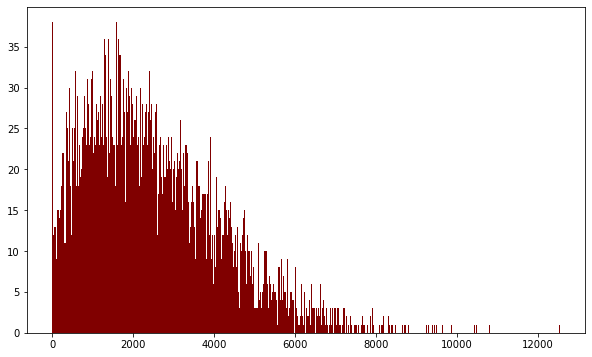

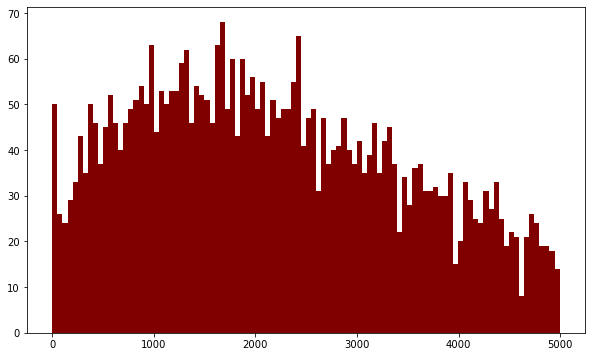

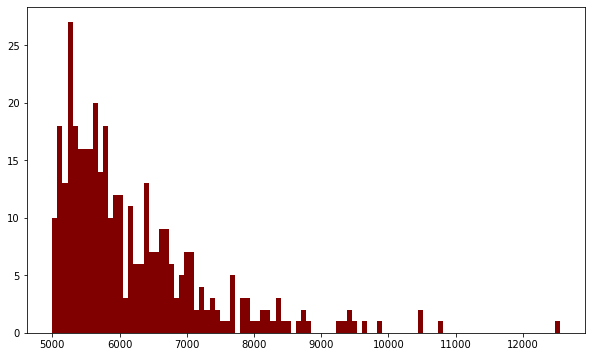

In [10]:
plt.figure(figsize = (10,6))
plt.hist(dataset["MONTHLY USAGE"], 500, color = "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"],100, color = "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(dataset[dataset["MONTHLY USAGE"] > 5000]["MONTHLY USAGE"],100, color = "maroon")
plt.show()

In [11]:
print(dataset.quantile(np.arange(0.0, 1.01, 0.05)))
dataset.quantile(np.arange(0.8, 1, 0.01))

      TOTAL USAGE  MONTHLY USAGE
0.00          1.0          1.000
0.05        809.4        330.175
0.10       1730.8        564.700
0.15       2775.2        802.125
0.20       3640.0       1005.400
0.25       4508.5       1221.500
0.30       5353.4       1418.000
0.35       6239.0       1631.700
0.40       7010.2       1820.700
0.45       7834.1       2021.575
0.50       8717.0       2245.500
0.55       9606.5       2446.350
0.60      10634.0       2703.500
0.65      11730.4       2966.950
0.70      12860.0       3249.400
0.75      14136.5       3569.250
0.80      15528.6       3898.300
0.85      17213.7       4311.250
0.90      19167.4       4807.050
0.95      22709.7       5677.425
1.00      50181.0      12545.250


TOTAL USAGE  MONTHLY USAGE
0.80     15528.60       3898.300
0.81     15785.88       3988.640
0.82     16229.56       4073.000
0.83     16531.42       4153.525
0.84     16904.44       4242.250
0.85     17213.70       4311.250
0.86     17525.96       4388.780
0.87     17836.76       4474.345
0.88     18293.68       4583.060
0.89     18844.04       4715.750
0.90     19167.40       4807.050
0.91     19668.38       4924.000
0.92     20453.32       5114.470
0.93     21159.56       5292.505
0.94     21905.16       5476.290
0.95     22709.70       5677.425
0.96     23627.04       5906.760
0.97     25159.26       6289.815
0.98     26751.20       6687.800
0.99     29432.64       7358.160

In [14]:
print(dataset[dataset["MONTHLY USAGE"] > 5000]["MONTHLY USAGE"])
dataset[dataset["MONTHLY USAGE"] <= 5000]

ATM ID
1CRGJAH03    5961.0
1CRGJAH04    5376.0
1CRGJAH05    7578.0
1CRGJAH06    7706.0
1CRGJAH07    5033.0
              ...  
5DEN07202    6677.2
5DEN10998    7103.8
5DEN11491    5238.4
5DEN13272    5944.8
5DEN15522    5248.0
Name: MONTHLY USAGE, Length: 466, dtype: float64


MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                        
1CRASEI01          CR   ONSITE    KOLKATA ZONE       UNIMAN   
1CRASKR01          CR   ONSITE    KOLKATA ZONE        SIXMI   
1CRGJAH01          CR   ONSITE  AHMEDABAD ZONE       BAPUNA   
1CRGJAH02          CR   ONSITE  AHMEDABAD ZONE       USMANP   
1CRGJAH09          CR   ONSITE  AHMEDABAD ZONE        ODHAV   
...               ...      ...             ...          ...   
5DEN17472  OPEX(DENA)  OFFSITE  AHMEDABAD ZONE       DBVAST   
5DEN17561  OPEX(DENA)  OFFSITE     RAJKOT ZONE       DBSASA   
5DEN18771  OPEX(DENA)   ONSITE     RAJKOT ZONE       DBDLIA   
5DEN18801  OPEX(DENA)   ONSITE     RAJKOT ZONE       DBKALY   
5DEN19111  OPEX(DENA)  OFFSITE    LUCKNOW ZONE       DBRZAR   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  
ATM ID                                                                  
1CRASEI01  SITE NOT UNDER SPECIAL CATEGORY         1701        1701.00  
1CRASKR01  SITE NOT UNDER SPECIAL CATEGORY         1121        1121.00  
1CRGJAH01  SITE NOT UNDER SPECIAL CATEGORY         4050        4050.00  
1CRGJAH02  SITE NOT UNDER SPECIAL CATEGORY         3075        3075.00  
1CRGJAH09  SITE NOT UNDER SPECIAL CATEGORY         3539        3539.00  
...                                    ...          ...            ...  
5DEN17472  SITE NOT UNDER SPECIAL CATEGORY        12893        2578.60  
5DEN17561  SITE NOT UNDER SPECIAL CATEGORY         6235        1247.00  
5DEN18771  SITE NOT UNDER SPECIAL CATEGORY         3459         864.75  
5DEN18801  SITE NOT UNDER SPECIAL CATEGORY         4479         895.80  
5DEN19111  SITE NOT UNDER SPECIAL CATEGORY         4401        1100.25  

[4553 rows x 7 columns]

In [15]:
dataset[dataset["MONTHLY USAGE"] <= 5000]["Site Category"].value_counts()

SITE NOT UNDER SPECIAL CATEGORY    4005
OTHER                               205
E-LOBBY                             197
PETROL PUMP                          73
FUTURE GROUP                         26
FOREIGNER TOURIST PLACE              12
EDUCATIONAL PLACE                     7
MTNL                                  7
RAILWAY STATION                       6
RELIGIOUS PLACE                       4
MARKET                                4
BUS STAND                             4
HOSPITAL                              2
AIRPORT                               1
Name: Site Category, dtype: int64

In [16]:
dataset.groupby("Site Category")["MONTHLY USAGE"].mean().sort_values()

Site Category
MTNL                                994.450000
AIRPORT                            1585.000000
RAILWAY STATION                    1648.633333
BUS STAND                          1674.450000
FUTURE GROUP                       2114.170370
PETROL PUMP                        2228.327137
HOSPITAL                           2343.600000
SITE NOT UNDER SPECIAL CATEGORY    2573.507294
OTHER                              2671.019432
EDUCATIONAL PLACE                  2799.475000
E-LOBBY                            2992.317035
FOREIGNER TOURIST PLACE            3258.076923
MARKET                             3689.366667
RELIGIOUS PLACE                    4446.000000
Name: MONTHLY USAGE, dtype: float64

In [17]:
dataset[dataset["MONTHLY USAGE"] <= 5000].groupby("Site Category")["MONTHLY USAGE"].mean().sort_values()

Site Category
MTNL                                349.628571
AIRPORT                            1585.000000
RAILWAY STATION                    1648.633333
BUS STAND                          1674.450000
FUTURE GROUP                       1984.200000
PETROL PUMP                        1986.283790
SITE NOT UNDER SPECIAL CATEGORY    2209.667141
HOSPITAL                           2343.600000
OTHER                              2377.962602
MARKET                             2418.550000
EDUCATIONAL PLACE                  2482.457143
E-LOBBY                            2537.479442
FOREIGNER TOURIST PLACE            3034.900000
RELIGIOUS PLACE                    4037.850000
Name: MONTHLY USAGE, dtype: float64

In [19]:
dataset["MACHINE"].value_counts()

CAPEX            3393
CR                631
CAPEX(VIJAYA)     343
CAPEX(DENA)       319
OPEX(DENA)        228
OPEX               76
BOB OPEX           29
Name: MACHINE, dtype: int64

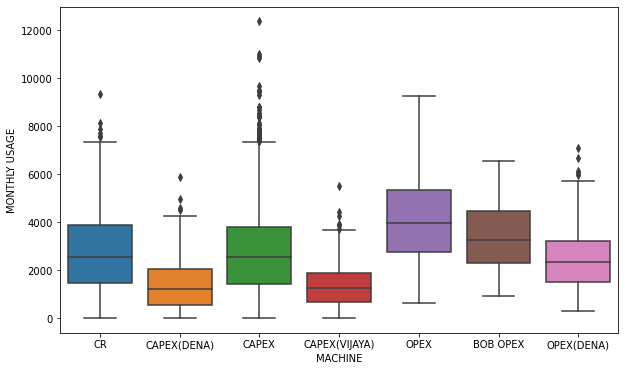

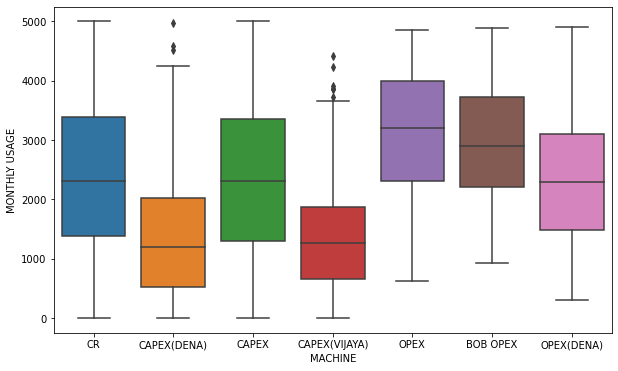

In [18]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["MACHINE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["MACHINE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

In [20]:
dataset.loc[dataset["MACHINE"].str.contains("CAPEX"), "MACHINE"] = "CAPEX"
dataset.loc[dataset["MACHINE"].str.contains("OPEX"), "MACHINE"] = "OPEX"
dataset["MACHINE"].value_counts()

CAPEX    4055
CR        631
OPEX      333
Name: MACHINE, dtype: int64

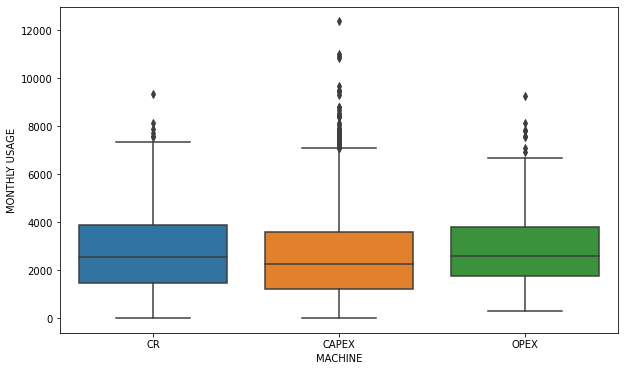

In [21]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["MACHINE"], y = dataset["MONTHLY USAGE"])
plt.show()

#plt.figure(figsize = (10,6))
#sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["MACHINE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
#plt.show()

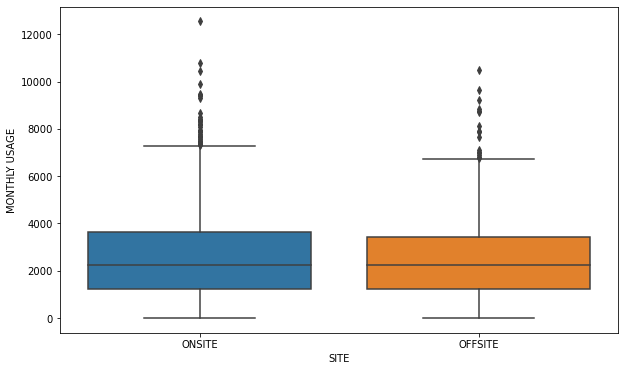

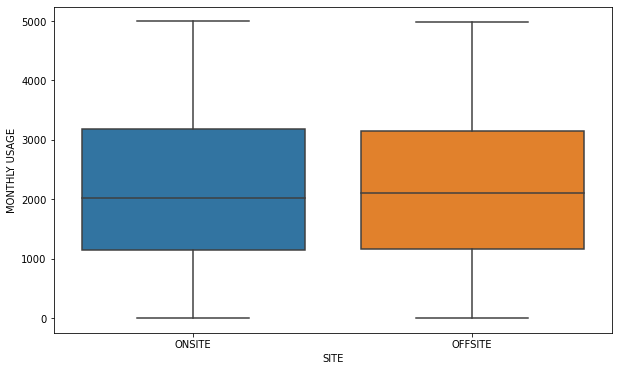

In [17]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["SITE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["SITE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

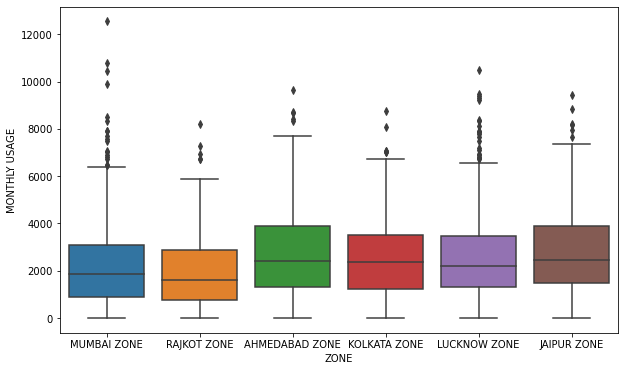

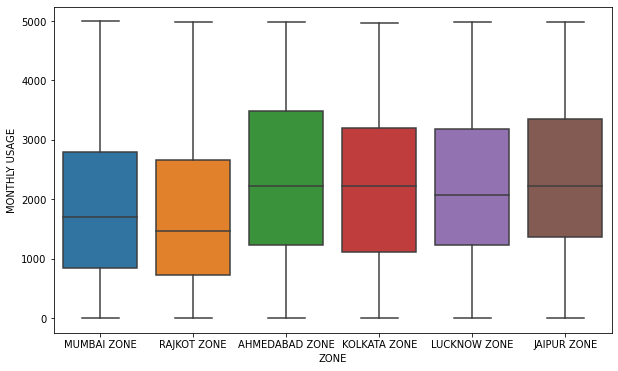

In [18]:
plt.figure(figsize = (10,6))
sns.boxplot(x = dataset["ZONE"], y = dataset["MONTHLY USAGE"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = dataset[dataset["MONTHLY USAGE"] <= 5000]["ZONE"], y = dataset[dataset["MONTHLY USAGE"] <= 5000]["MONTHLY USAGE"])
plt.show()

In [ ]:
## descriptive analysis with error data

In [19]:
error = pd.read_csv("error count.csv")
error = error.rename(columns = {error.columns[0]: "ATM ID"})
error = error.set_index("ATM ID")
error

week 1  week 2  week 3  week 4  week 5  week 6  week 7  week 8  \
ATM ID                                                                       
1FWBDN25        10       3       2       1       8      18      32      36   
1RDDALD07       10      29       2       1       6       0      14      21   
1RDDAYD01       14       1       6       3      25      21      45       7   
1RDDGKP02       15       3       9       2      23      15      43      36   
1RDDKAN01        4       1       0       0      24      21      32      12   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1CRGJKA08        0       0       0       0       0       0       0       0   
1CRHKOBL03       0       0       0       0       0       0       0       0   
1FNKOL202        0       0       0       0       0       0       0       0   
1FDBOM289        0       0       0       0       0       0       0       0   
1FNUNO01         0       0       0       0       0       0       0       0   

            week 9  week 10  week 11  week 12  week 13  week 14  week 15  \
ATM ID                                                                     
1FWBDN25        17       18        1        0        0        9       14   
1RDDALD07       16        4        0        0        1       61       65   
1RDDAYD01        6       10       12       18        1       64       74   
1RDDGKP02       25        6        0        0        3       49       63   
1RDDKAN01       10        0        0        0        3       27       22   
...            ...      ...      ...      ...      ...      ...      ...   
1CRGJKA08        0        0        0        0        0        0       25   
1CRHKOBL03       0        0        0        0        0        0       75   
1FNKOL202        0        0        0        0        0        0        3   
1FDBOM289        0        0        0        0        0        0        0   
1FNUNO01         0        0        0        0        0        0        0   

            week 16  week 17  week 18  
ATM ID                                 
1FWBDN25          9       20        5  
1RDDALD07        52       21        4  
1RDDAYD01        62       41       23  
1RDDGKP02        23        6        0  
1RDDKAN01        29       30        5  
...             ...      ...      ...  
1CRGJKA08         8        7        3  
1CRHKOBL03       46       28       37  
1FNKOL202         1        8        1  
1FDBOM289        13       15        1  
1FNUNO01          0       19        4  

[3941 rows x 18 columns]

In [20]:
ticket = pd.read_csv("ticket count.csv")
ticket = ticket.rename(columns = {ticket.columns[0]: "ATM ID"})
ticket = ticket.set_index("ATM ID")
ticket

week 1  week 2  week 3  week 4  week 5  week 6  week 7  week 8  \
ATM ID                                                                       
1RDDJAI26        2       3       0       5       4       2       1       0   
1FNJNP09         4       2       1       7       5       1       4       2   
1FNMAU06         1       0       0       0       2       1       1       2   
1FNKAN98         4       0       1       1       1       3       3       4   
1FDJDP44         4       0       2       3       3       1       2       1   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1FNBHL07         0       0       0       0       0       0       0       0   
1FNUTT02         0       0       0       0       0       0       0       0   
1RDNMUM55        0       0       0       0       0       0       0       0   
1CRHUPVA04       0       0       0       0       0       0       0       0   
1FNKAN106        0       0       0       0       0       0       0       0   

            week 9  week 10  week 11  week 12  week 13  week 14  week 15  \
ATM ID                                                                     
1RDDJAI26        0        0        0        0        0        0        0   
1FNJNP09         1        0        3        1        0        0        1   
1FNMAU06         3        6        3        0        3       12        8   
1FNKAN98         3        2        3        7        3        3        5   
1FDJDP44         0        2        3        3        2        6        6   
...            ...      ...      ...      ...      ...      ...      ...   
1FNBHL07         0        0        0        0        0        0        0   
1FNUTT02         0        0        0        0        0        0        0   
1RDNMUM55        0        0        0        0        0        0        0   
1CRHUPVA04       0        0        0        0        0        0        0   
1FNKAN106        0        0        0        0        0        0        0   

            week 16  week 17  week 18  
ATM ID                                 
1RDDJAI26         3        1        0  
1FNJNP09          0        1        0  
1FNMAU06          7        2        0  
1FNKAN98          2        4        1  
1FDJDP44          1        2        0  
...             ...      ...      ...  
1FNBHL07          5        1        0  
1FNUTT02          2        1        0  
1RDNMUM55         1        3        0  
1CRHUPVA04        0        1        0  
1FNKAN106         0        2        0  

[4087 rows x 18 columns]

In [21]:
error["Weekly Avg Error"] = round(error.mean(axis = 1),3)
error

week 1  week 2  week 3  week 4  week 5  week 6  week 7  week 8  \
ATM ID                                                                       
1FWBDN25        10       3       2       1       8      18      32      36   
1RDDALD07       10      29       2       1       6       0      14      21   
1RDDAYD01       14       1       6       3      25      21      45       7   
1RDDGKP02       15       3       9       2      23      15      43      36   
1RDDKAN01        4       1       0       0      24      21      32      12   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1CRGJKA08        0       0       0       0       0       0       0       0   
1CRHKOBL03       0       0       0       0       0       0       0       0   
1FNKOL202        0       0       0       0       0       0       0       0   
1FDBOM289        0       0       0       0       0       0       0       0   
1FNUNO01         0       0       0       0       0       0       0       0   

            week 9  week 10  week 11  week 12  week 13  week 14  week 15  \
ATM ID                                                                     
1FWBDN25        17       18        1        0        0        9       14   
1RDDALD07       16        4        0        0        1       61       65   
1RDDAYD01        6       10       12       18        1       64       74   
1RDDGKP02       25        6        0        0        3       49       63   
1RDDKAN01       10        0        0        0        3       27       22   
...            ...      ...      ...      ...      ...      ...      ...   
1CRGJKA08        0        0        0        0        0        0       25   
1CRHKOBL03       0        0        0        0        0        0       75   
1FNKOL202        0        0        0        0        0        0        3   
1FDBOM289        0        0        0        0        0        0        0   
1FNUNO01         0        0        0        0        0        0        0   

            week 16  week 17  week 18  Weekly Avg Error  
ATM ID                                                   
1FWBDN25          9       20        5            11.278  
1RDDALD07        52       21        4            17.056  
1RDDAYD01        62       41       23            24.056  
1RDDGKP02        23        6        0            17.833  
1RDDKAN01        29       30        5            12.222  
...             ...      ...      ...               ...  
1CRGJKA08         8        7        3             2.389  
1CRHKOBL03       46       28       37            10.333  
1FNKOL202         1        8        1             0.722  
1FDBOM289        13       15        1             1.611  
1FNUNO01          0       19        4             1.278  

[3941 rows x 19 columns]

In [22]:
ticket["Weekly Avg Ticket"] = round(ticket.mean(axis = 1),3)
ticket

week 1  week 2  week 3  week 4  week 5  week 6  week 7  week 8  \
ATM ID                                                                       
1RDDJAI26        2       3       0       5       4       2       1       0   
1FNJNP09         4       2       1       7       5       1       4       2   
1FNMAU06         1       0       0       0       2       1       1       2   
1FNKAN98         4       0       1       1       1       3       3       4   
1FDJDP44         4       0       2       3       3       1       2       1   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1FNBHL07         0       0       0       0       0       0       0       0   
1FNUTT02         0       0       0       0       0       0       0       0   
1RDNMUM55        0       0       0       0       0       0       0       0   
1CRHUPVA04       0       0       0       0       0       0       0       0   
1FNKAN106        0       0       0       0       0       0       0       0   

            week 9  week 10  week 11  week 12  week 13  week 14  week 15  \
ATM ID                                                                     
1RDDJAI26        0        0        0        0        0        0        0   
1FNJNP09         1        0        3        1        0        0        1   
1FNMAU06         3        6        3        0        3       12        8   
1FNKAN98         3        2        3        7        3        3        5   
1FDJDP44         0        2        3        3        2        6        6   
...            ...      ...      ...      ...      ...      ...      ...   
1FNBHL07         0        0        0        0        0        0        0   
1FNUTT02         0        0        0        0        0        0        0   
1RDNMUM55        0        0        0        0        0        0        0   
1CRHUPVA04       0        0        0        0        0        0        0   
1FNKAN106        0        0        0        0        0        0        0   

            week 16  week 17  week 18  Weekly Avg Ticket  
ATM ID                                                    
1RDDJAI26         3        1        0              1.167  
1FNJNP09          0        1        0              1.833  
1FNMAU06          7        2        0              2.833  
1FNKAN98          2        4        1              2.778  
1FDJDP44          1        2        0              2.278  
...             ...      ...      ...                ...  
1FNBHL07          5        1        0              0.333  
1FNUTT02          2        1        0              0.167  
1RDNMUM55         1        3        0              0.222  
1CRHUPVA04        0        1        0              0.056  
1FNKAN106         0        2        0              0.111  

[4087 rows x 19 columns]

In [23]:
df = pd.merge(dataset, ticket["Weekly Avg Ticket"], right_index = True, left_index = True)
df = pd.merge(df, error["Weekly Avg Error"], right_index = True, left_index = True)
df

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                           
1DBA02691    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBHSOL   
1DBA03051    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBTLOD   
1DBA03301    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBHIMA   
1DBA03311    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBPRAN   
1DBA04021    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBSHRT   
...                  ...      ...             ...          ...   
1VD716201  CAPEX(VIJAYA)   ONSITE    LUCKNOW ZONE       BLYTHA   
1VD717601  CAPEX(VIJAYA)   ONSITE    LUCKNOW ZONE       VJHAID   
1VW702401  CAPEX(VIJAYA)  OFFSITE     JAIPUR ZONE       JODMAN   
1VW732201  CAPEX(VIJAYA)   ONSITE  AHMEDABAD ZONE       VJGNGR   
1VW734501  CAPEX(VIJAYA)  OFFSITE  AHMEDABAD ZONE       VJHIMM   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  \
ATM ID                                                                   
1DBA02691  SITE NOT UNDER SPECIAL CATEGORY         7775        1943.75   
1DBA03051  SITE NOT UNDER SPECIAL CATEGORY        11045        2761.25   
1DBA03301  SITE NOT UNDER SPECIAL CATEGORY        19313        4828.25   
1DBA03311  SITE NOT UNDER SPECIAL CATEGORY        11195        2798.75   
1DBA04021  SITE NOT UNDER SPECIAL CATEGORY        14050        3512.50   
...                                    ...          ...            ...   
1VD716201  SITE NOT UNDER SPECIAL CATEGORY          687         171.75   
1VD717601  SITE NOT UNDER SPECIAL CATEGORY          425         106.25   
1VW702401  SITE NOT UNDER SPECIAL CATEGORY         2125         531.25   
1VW732201  SITE NOT UNDER SPECIAL CATEGORY        12021        3005.25   
1VW734501  SITE NOT UNDER SPECIAL CATEGORY         5686        1421.50   

           Weekly Avg Ticket  Weekly Avg Error  
ATM ID                                          
1DBA02691              0.722             8.111  
1DBA03051              0.333            11.500  
1DBA03301              1.111            17.000  
1DBA03311              1.722            10.000  
1DBA04021              0.722            10.111  
...                      ...               ...  
1VD716201              0.111             3.722  
1VD717601              1.722             8.778  
1VW702401              1.556             7.833  
1VW732201              0.722            10.611  
1VW734501              3.333             8.056  

[3288 rows x 9 columns]

In [24]:
ticket.loc["1VW732201","Weekly Avg Ticket"], error.loc["1VW732201","Weekly Avg Error"]

(0.722, 10.611)

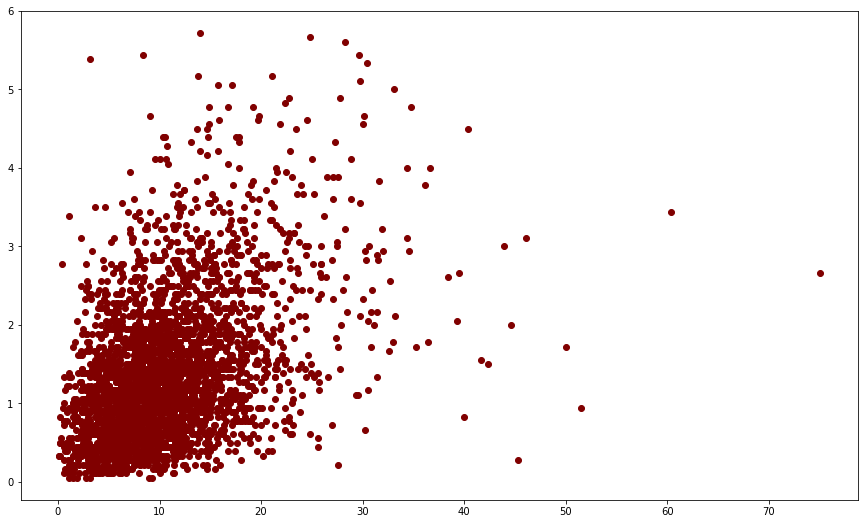

In [25]:
plt.figure(figsize = (15,9))
plt.scatter(df["Weekly Avg Error"], df["Weekly Avg Ticket"], color = "maroon")
plt.show()

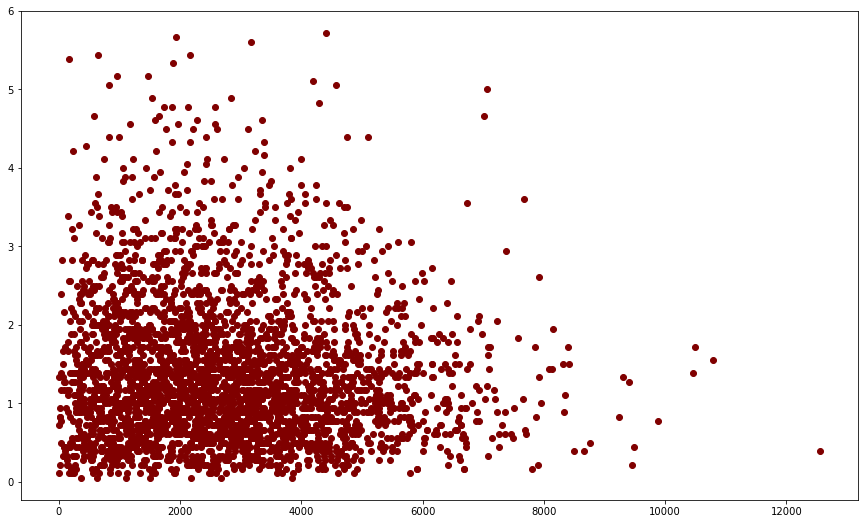

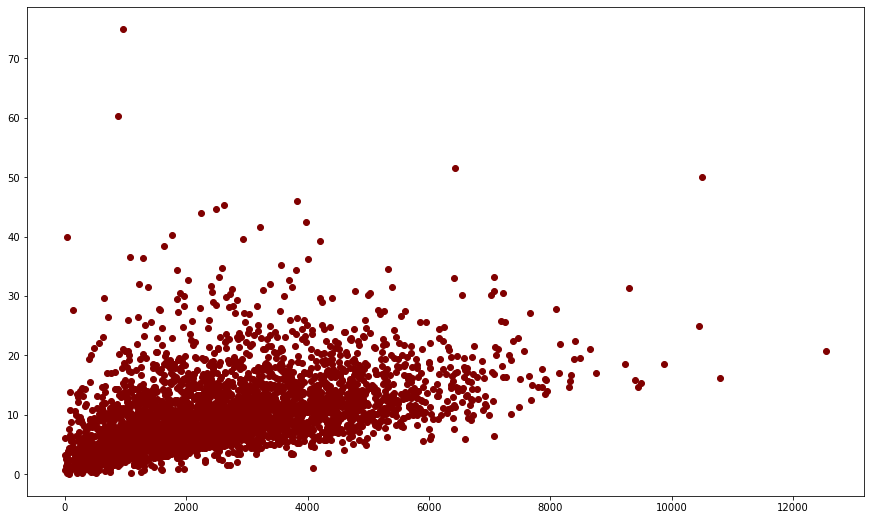

In [26]:
plt.figure(figsize = (15,9))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Weekly Avg Ticket"], color = "maroon")
plt.show()

plt.figure(figsize = (15,9))
#plt.scatter(df[df["MONTHLY USAGE"]<=5000]["MONTHLY USAGE"], df[df["MONTHLY USAGE"]<=5000]["Weekly Avg Ticket"])
plt.scatter(df["MONTHLY USAGE"],df["Weekly Avg Error"], color = "maroon")
plt.show()

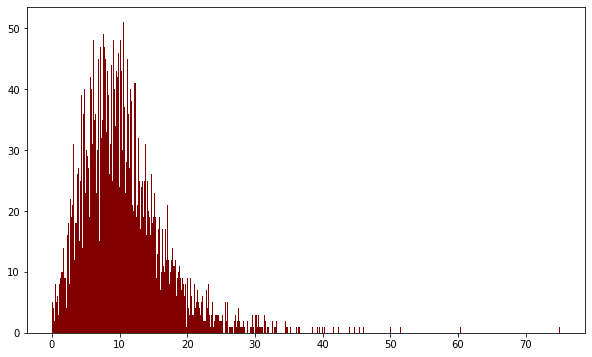

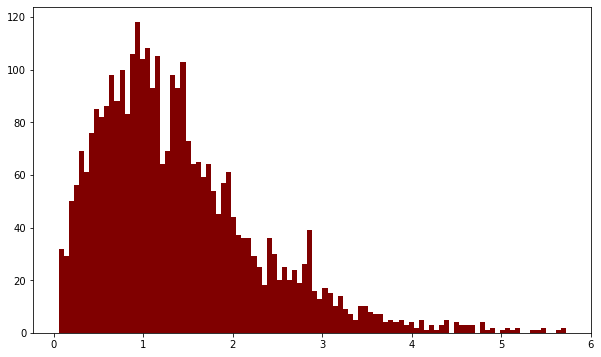

In [27]:
plt.figure(figsize = (10,6))
plt.hist(df["Weekly Avg Error"], 500, color= "maroon")
plt.show()

plt.figure(figsize = (10,6))
plt.hist(df["Weekly Avg Ticket"], 100, color= "maroon")
plt.show()

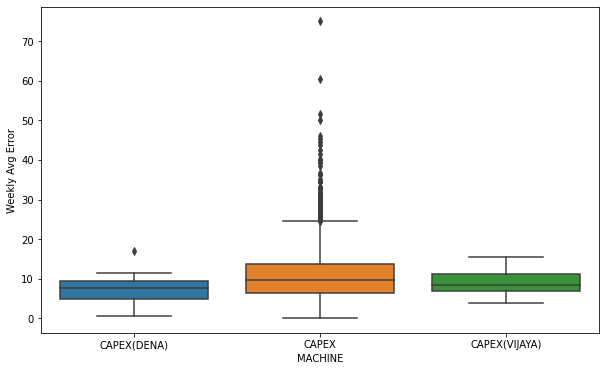

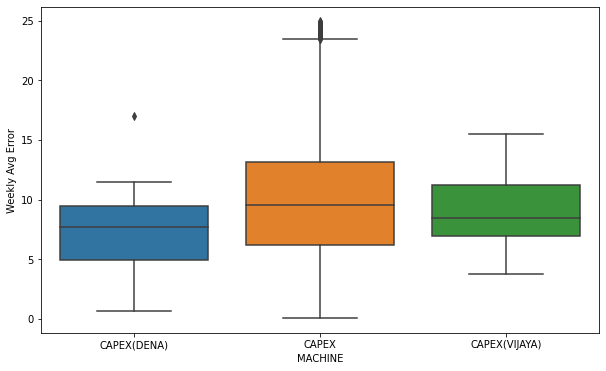

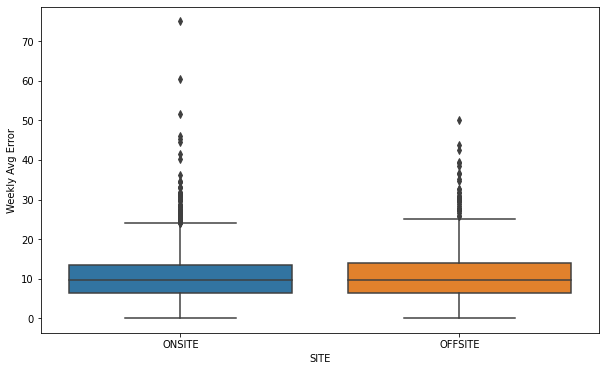

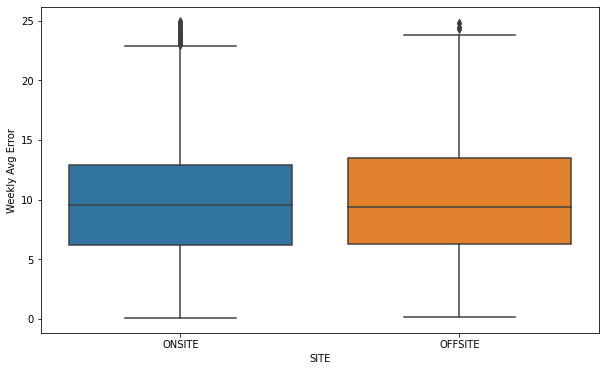

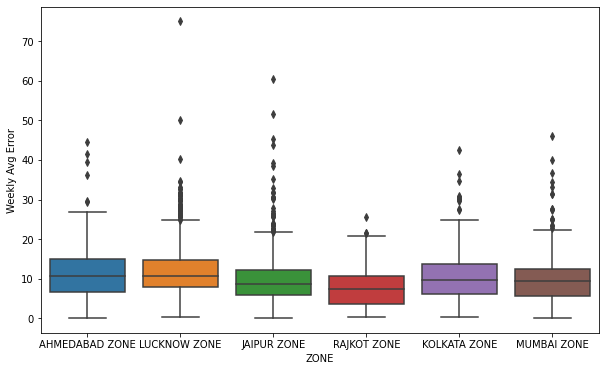

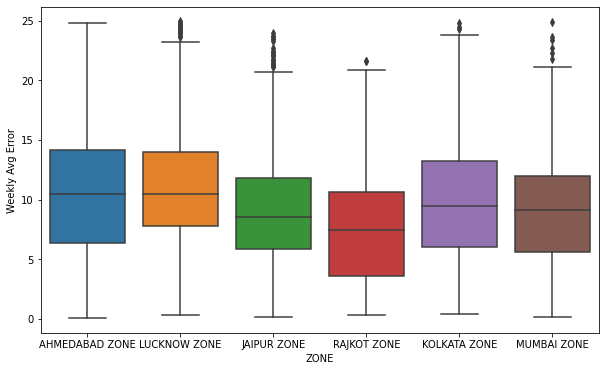

In [28]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Weekly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Weekly Avg Error"]<=25]["Weekly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Weekly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df[df["Weekly Avg Error"]<=25]["Weekly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Weekly Avg Error"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df[df["Weekly Avg Error"]<=25]["Weekly Avg Error"])
plt.show()

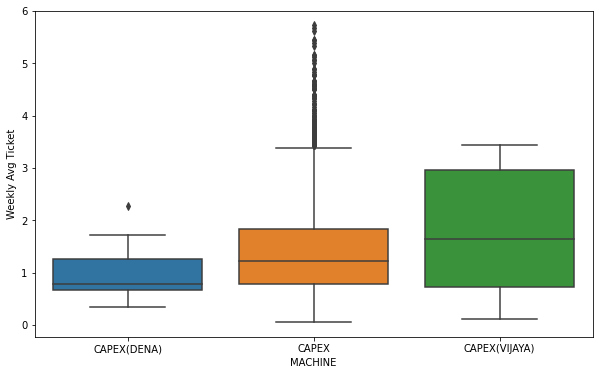

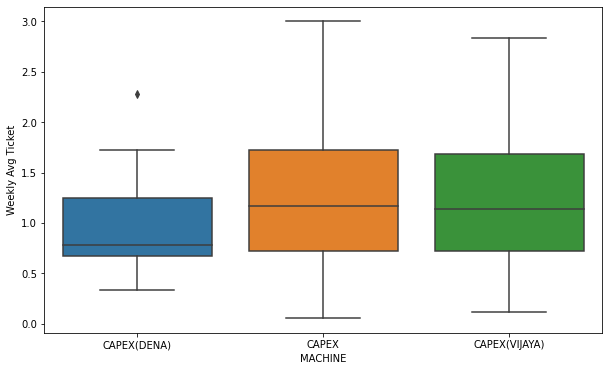

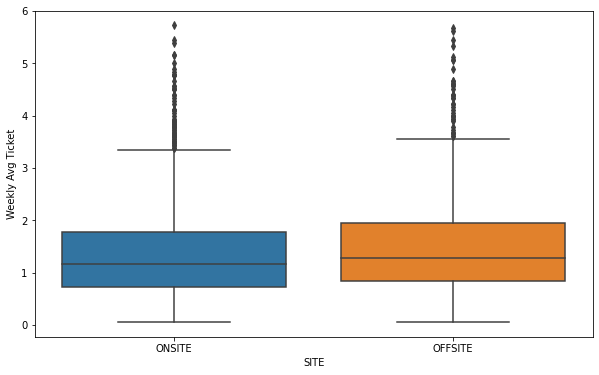

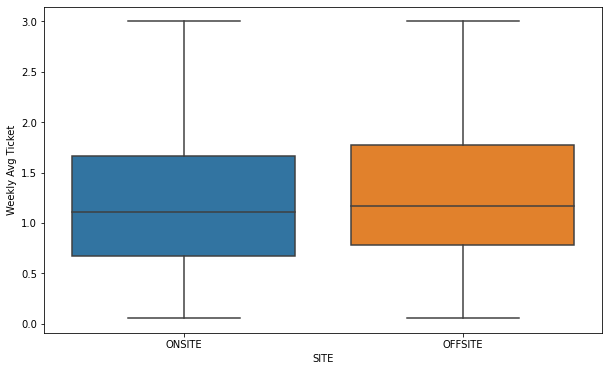

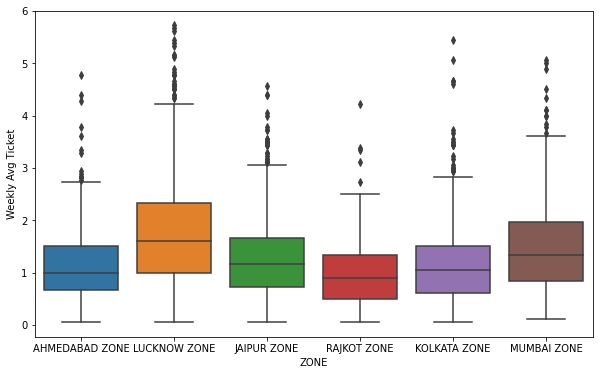

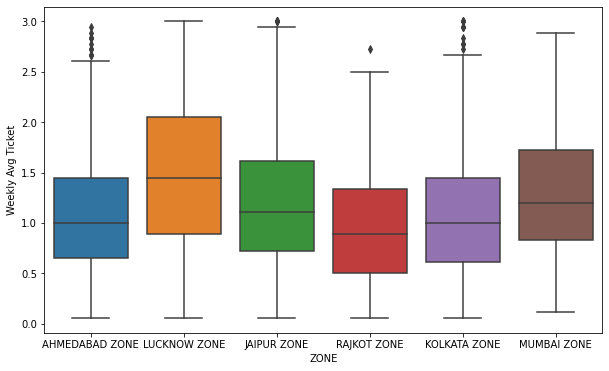

In [29]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df["Weekly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Weekly Avg Ticket"]<=3]["Weekly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df["Weekly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["SITE"], y = df[df["Weekly Avg Ticket"]<=3]["Weekly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df["Weekly Avg Ticket"])
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(x = df["ZONE"], y = df[df["Weekly Avg Ticket"]<=3]["Weekly Avg Ticket"])
plt.show()

In [30]:
df.loc[(df["Weekly Avg Error"] <= 25) & (df["Weekly Avg Ticket"] <= 3)]

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                           
1DBA02691    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBHSOL   
1DBA03051    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBTLOD   
1DBA03301    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBHIMA   
1DBA03311    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBPRAN   
1DBA04021    CAPEX(DENA)   ONSITE  AHMEDABAD ZONE       DBSHRT   
...                  ...      ...             ...          ...   
1VD704901  CAPEX(VIJAYA)  OFFSITE     JAIPUR ZONE       JAICOM   
1VD716201  CAPEX(VIJAYA)   ONSITE    LUCKNOW ZONE       BLYTHA   
1VD717601  CAPEX(VIJAYA)   ONSITE    LUCKNOW ZONE       VJHAID   
1VW702401  CAPEX(VIJAYA)  OFFSITE     JAIPUR ZONE       JODMAN   
1VW732201  CAPEX(VIJAYA)   ONSITE  AHMEDABAD ZONE       VJGNGR   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  \
ATM ID                                                                   
1DBA02691  SITE NOT UNDER SPECIAL CATEGORY         7775        1943.75   
1DBA03051  SITE NOT UNDER SPECIAL CATEGORY        11045        2761.25   
1DBA03301  SITE NOT UNDER SPECIAL CATEGORY        19313        4828.25   
1DBA03311  SITE NOT UNDER SPECIAL CATEGORY        11195        2798.75   
1DBA04021  SITE NOT UNDER SPECIAL CATEGORY        14050        3512.50   
...                                    ...          ...            ...   
1VD704901  SITE NOT UNDER SPECIAL CATEGORY          127          63.50   
1VD716201  SITE NOT UNDER SPECIAL CATEGORY          687         171.75   
1VD717601  SITE NOT UNDER SPECIAL CATEGORY          425         106.25   
1VW702401  SITE NOT UNDER SPECIAL CATEGORY         2125         531.25   
1VW732201  SITE NOT UNDER SPECIAL CATEGORY        12021        3005.25   

           Weekly Avg Ticket  Weekly Avg Error  
ATM ID                                          
1DBA02691              0.722             8.111  
1DBA03051              0.333            11.500  
1DBA03301              1.111            17.000  
1DBA03311              1.722            10.000  
1DBA04021              0.722            10.111  
...                      ...               ...  
1VD704901              2.833             4.389  
1VD716201              0.111             3.722  
1VD717601              1.722             8.778  
1VW702401              1.556             7.833  
1VW732201              0.722            10.611  

[3025 rows x 9 columns]

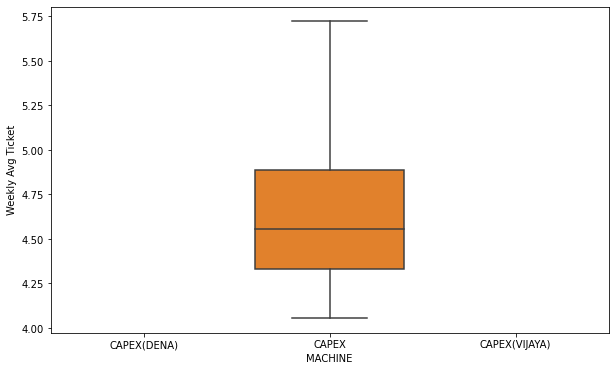

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                           
1FDABN38           CAPEX   ONSITE    LUCKNOW ZONE       DAULAT   
1FDAJM25           CAPEX   ONSITE     JAIPUR ZONE       MAYAJM   
1FDAJM57           CAPEX  OFFSITE     JAIPUR ZONE       SARADH   
1FDAZM09           CAPEX   ONSITE    LUCKNOW ZONE       BIJAUR   
1FDBAH01           CAPEX   ONSITE    LUCKNOW ZONE       KAISAR   
...                  ...      ...             ...          ...   
1RDWPTP04          CAPEX   ONSITE    LUCKNOW ZONE         ANTU   
1RDWUDP12          CAPEX  OFFSITE     JAIPUR ZONE       UDAIPU   
1RNDAZM06          CAPEX   ONSITE    LUCKNOW ZONE       ANWABS   
1VD703601  CAPEX(VIJAYA)  OFFSITE     JAIPUR ZONE       BAGRAN   
1VW734501  CAPEX(VIJAYA)  OFFSITE  AHMEDABAD ZONE       VJHIMM   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  \
ATM ID                                                                   
1FDABN38   SITE NOT UNDER SPECIAL CATEGORY         4398        1099.50   
1FDAJM25   SITE NOT UNDER SPECIAL CATEGORY         6627        1656.75   
1FDAJM57   SITE NOT UNDER SPECIAL CATEGORY         8449        2112.25   
1FDAZM09   SITE NOT UNDER SPECIAL CATEGORY        17485        4371.25   
1FDBAH01   SITE NOT UNDER SPECIAL CATEGORY         4813        1203.25   
...                                    ...          ...            ...   
1RDWPTP04  SITE NOT UNDER SPECIAL CATEGORY         6409        1602.25   
1RDWUDP12  SITE NOT UNDER SPECIAL CATEGORY         3437         859.25   
1RNDAZM06  SITE NOT UNDER SPECIAL CATEGORY         4878        1219.50   
1VD703601  SITE NOT UNDER SPECIAL CATEGORY         2137         534.25   
1VW734501  SITE NOT UNDER SPECIAL CATEGORY         5686        1421.50   

           Weekly Avg Ticket  Weekly Avg Error  
ATM ID                                          
1FDABN38               3.889            14.444  
1FDAJM25               3.444             8.000  
1FDAJM57               4.056            16.722  
1FDAZM09               3.278            21.500  
1FDBAH01               3.889            26.500  
...                      ...               ...  
1RDWPTP04              4.222            15.778  
1RDWUDP12              3.500            11.722  
1RNDAZM06              4.111            10.667  
1VD703601              3.444            13.056  
1VW734501              3.333             8.056  

[197 rows x 9 columns]

In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df["MACHINE"], y = df[df["Weekly Avg Ticket"]>4]["Weekly Avg Ticket"])
plt.show()

df[df["Weekly Avg Ticket"]>3]

In [32]:
df.loc[(df["Weekly Avg Error"] > 25) | (df["Weekly Avg Ticket"] > 3)]

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                           
1FDABN38           CAPEX   ONSITE    LUCKNOW ZONE       DAULAT   
1FDAJM25           CAPEX   ONSITE     JAIPUR ZONE       MAYAJM   
1FDAJM27           CAPEX  OFFSITE     JAIPUR ZONE       SAVAJM   
1FDAJM29           CAPEX   ONSITE     JAIPUR ZONE       UDAIRO   
1FDAJM57           CAPEX  OFFSITE     JAIPUR ZONE       SARADH   
...                  ...      ...             ...          ...   
1RDWUDP12          CAPEX  OFFSITE     JAIPUR ZONE       UDAIPU   
1RDWVAR29          CAPEX  OFFSITE    LUCKNOW ZONE        LANKA   
1RNDAZM06          CAPEX   ONSITE    LUCKNOW ZONE       ANWABS   
1VD703601  CAPEX(VIJAYA)  OFFSITE     JAIPUR ZONE       BAGRAN   
1VW734501  CAPEX(VIJAYA)  OFFSITE  AHMEDABAD ZONE       VJHIMM   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  \
ATM ID                                                                   
1FDABN38   SITE NOT UNDER SPECIAL CATEGORY         4398        1099.50   
1FDAJM25   SITE NOT UNDER SPECIAL CATEGORY         6627        1656.75   
1FDAJM27   SITE NOT UNDER SPECIAL CATEGORY         9674        2418.50   
1FDAJM29                           E-LOBBY        28891        7222.75   
1FDAJM57   SITE NOT UNDER SPECIAL CATEGORY         8449        2112.25   
...                                    ...          ...            ...   
1RDWUDP12  SITE NOT UNDER SPECIAL CATEGORY         3437         859.25   
1RDWVAR29  SITE NOT UNDER SPECIAL CATEGORY        41983       10495.75   
1RNDAZM06  SITE NOT UNDER SPECIAL CATEGORY         4878        1219.50   
1VD703601  SITE NOT UNDER SPECIAL CATEGORY         2137         534.25   
1VW734501  SITE NOT UNDER SPECIAL CATEGORY         5686        1421.50   

           Weekly Avg Ticket  Weekly Avg Error  
ATM ID                                          
1FDABN38               3.889            14.444  
1FDAJM25               3.444             8.000  
1FDAJM27               3.000            30.611  
1FDAJM29               2.056            30.556  
1FDAJM57               4.056            16.722  
...                      ...               ...  
1RDWUDP12              3.500            11.722  
1RDWVAR29              1.722            50.000  
1RNDAZM06              4.111            10.667  
1VD703601              3.444            13.056  
1VW734501              3.333             8.056  

[263 rows x 9 columns]

In [31]:
df[df["Weekly Avg Ticket"]>3]

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                           
1FDABN38           CAPEX   ONSITE    LUCKNOW ZONE       DAULAT   
1FDAJM25           CAPEX   ONSITE     JAIPUR ZONE       MAYAJM   
1FDAJM57           CAPEX  OFFSITE     JAIPUR ZONE       SARADH   
1FDAZM09           CAPEX   ONSITE    LUCKNOW ZONE       BIJAUR   
1FDBAH01           CAPEX   ONSITE    LUCKNOW ZONE       KAISAR   
...                  ...      ...             ...          ...   
1RDWPTP04          CAPEX   ONSITE    LUCKNOW ZONE         ANTU   
1RDWUDP12          CAPEX  OFFSITE     JAIPUR ZONE       UDAIPU   
1RNDAZM06          CAPEX   ONSITE    LUCKNOW ZONE       ANWABS   
1VD703601  CAPEX(VIJAYA)  OFFSITE     JAIPUR ZONE       BAGRAN   
1VW734501  CAPEX(VIJAYA)  OFFSITE  AHMEDABAD ZONE       VJHIMM   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  \
ATM ID                                                                   
1FDABN38   SITE NOT UNDER SPECIAL CATEGORY         4398        1099.50   
1FDAJM25   SITE NOT UNDER SPECIAL CATEGORY         6627        1656.75   
1FDAJM57   SITE NOT UNDER SPECIAL CATEGORY         8449        2112.25   
1FDAZM09   SITE NOT UNDER SPECIAL CATEGORY        17485        4371.25   
1FDBAH01   SITE NOT UNDER SPECIAL CATEGORY         4813        1203.25   
...                                    ...          ...            ...   
1RDWPTP04  SITE NOT UNDER SPECIAL CATEGORY         6409        1602.25   
1RDWUDP12  SITE NOT UNDER SPECIAL CATEGORY         3437         859.25   
1RNDAZM06  SITE NOT UNDER SPECIAL CATEGORY         4878        1219.50   
1VD703601  SITE NOT UNDER SPECIAL CATEGORY         2137         534.25   
1VW734501  SITE NOT UNDER SPECIAL CATEGORY         5686        1421.50   

           Weekly Avg Ticket  Weekly Avg Error  
ATM ID                                          
1FDABN38               3.889            14.444  
1FDAJM25               3.444             8.000  
1FDAJM57               4.056            16.722  
1FDAZM09               3.278            21.500  
1FDBAH01               3.889            26.500  
...                      ...               ...  
1RDWPTP04              4.222            15.778  
1RDWUDP12              3.500            11.722  
1RNDAZM06              4.111            10.667  
1VD703601              3.444            13.056  
1VW734501              3.333             8.056  

[197 rows x 9 columns]

In [33]:
df[df["Weekly Avg Error"]>25]

MACHINE     SITE            ZONE BRANCH_ALPHA  \
ATM ID                                                    
1FDAJM27    CAPEX  OFFSITE     JAIPUR ZONE       SAVAJM   
1FDAJM29    CAPEX   ONSITE     JAIPUR ZONE       UDAIRO   
1FDALD130   CAPEX  OFFSITE    LUCKNOW ZONE       PHAPHA   
1FDBAH01    CAPEX   ONSITE    LUCKNOW ZONE       KAISAR   
1FDBAN03    CAPEX   ONSITE    LUCKNOW ZONE       KALUKU   
...           ...      ...             ...          ...   
1RDWAHM53   CAPEX   ONSITE  AHMEDABAD ZONE       MOTERA   
1RDWBDN02   CAPEX   ONSITE    KOLKATA ZONE        KALNA   
1RDWKOL70   CAPEX  OFFSITE    KOLKATA ZONE       SODEPU   
1RDWKUS01   CAPEX   ONSITE    LUCKNOW ZONE       PADRAU   
1RDWVAR29   CAPEX  OFFSITE    LUCKNOW ZONE        LANKA   

                             Site Category  TOTAL USAGE  MONTHLY USAGE  \
ATM ID                                                                   
1FDAJM27   SITE NOT UNDER SPECIAL CATEGORY         9674        2418.50   
1FDAJM29                           E-LOBBY        28891        7222.75   
1FDALD130                     FUTURE GROUP        10628        2657.00   
1FDBAH01   SITE NOT UNDER SPECIAL CATEGORY         4813        1203.25   
1FDBAN03   SITE NOT UNDER SPECIAL CATEGORY        16969        4242.25   
...                                    ...          ...            ...   
1RDWAHM53  SITE NOT UNDER SPECIAL CATEGORY        20769        5192.25   
1RDWBDN02  SITE NOT UNDER SPECIAL CATEGORY        32370        8092.50   
1RDWKOL70  SITE NOT UNDER SPECIAL CATEGORY        28079        7019.75   
1RDWKUS01  SITE NOT UNDER SPECIAL CATEGORY        30668        7667.00   
1RDWVAR29  SITE NOT UNDER SPECIAL CATEGORY        41983       10495.75   

           Weekly Avg Ticket  Weekly Avg Error  
ATM ID                                          
1FDAJM27               3.000            30.611  
1FDAJM29               2.056            30.556  
1FDALD130              2.111            29.778  
1FDBAH01               3.889            26.500  
1FDBAN03               3.611            28.889  
...                      ...               ...  
1RDWAHM53              2.833            26.944  
1RDWBDN02              1.444            27.722  
1RDWKOL70              4.667            30.167  
1RDWKUS01              3.611            27.111  
1RDWVAR29              1.722            50.000  

[97 rows x 9 columns]